<a href="https://colab.research.google.com/github/cafrii/fastai_fastbook/blob/main/02_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 953.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [5]:
!pip install -Uqq nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires fastcore<1.8,>=1.5.29, but you have fastcore 1.8.1 which is incompatible.


# From Model to Production

The six lines of code we saw in <<chapter_intro>> are just one small part of the process of using deep learning in practice. In this chapter, we're going to use a computer vision example to look at the end-to-end process of creating a deep learning application. More specifically, we're going to build a bear classifier! In the process, we'll discuss the capabilities and constraints of deep learning, explore how to create datasets, look at possible gotchas when using deep learning in practice, and more. Many of the key points will apply equally well to other deep learning problems, such as those in <<chapter_intro>>. If you work through a problem similar in key respects to our example problems, we expect you to get excellent results with little code, quickly.

< >에서 본 여섯 줄의 코드는 실제로 딥 러닝을 사용하는 프로세스의 일부에 불과합니다. 이 장에서는 컴퓨터 비전 예제를 사용하여 딥 러닝 애플리케이션을 만드는 종단 간 프로세스를 살펴보겠습니다. 더 구체적으로, 곰 분류기를 만들어 보겠습니다! 이 과정에서 딥 러닝의 기능과 제약에 대해 논의하고, 데이터 세트를 만드는 방법을 살펴보고, 실제로 딥 러닝을 사용할 때 발생할 수 있는 문제점을 살펴보고, 더 많은 것을 할 것입니다. 핵심 요점 중 다수는 < >와 같은 다른 딥 러닝 문제에도 마찬가지로 잘 적용될 것입니다. 예제 문제와 핵심 측면에서 유사한 문제를 해결한다면 적은 코드로 빠르게 뛰어난 결과를 얻을 수 있을 것으로 기대합니다.

Let's start with how you should frame your problem.

먼저, 문제를 어떻게 정의해야 할지부터 시작해 보겠습니다.

## The Practice of Deep Learning

We've seen that deep learning can solve a lot of challenging problems quickly and with little code. As a beginner, there's a sweet spot of problems that are similar enough to our example problems that you can very quickly get extremely useful results. However, deep learning isn't magic! The same 6 lines of code won't work for every problem anyone can think of today. Underestimating the constraints and overestimating the capabilities of deep learning may lead to frustratingly poor results, at least until you gain some experience and can solve the problems that arise. Conversely, overestimating the constraints and underestimating the capabilities of deep learning may mean you do not attempt a solvable problem because you talk yourself out of it.

우리는 딥 러닝이 많은 어려운 문제를 빠르고 적은 코드로 해결할 수 있다는 것을 보았습니다. 초보자에게는 우리의 예제 문제와 충분히 유사한 문제가 있어서 매우 유용한 결과를 매우 빠르게 얻을 수 있습니다. 그러나 딥 러닝은 마법이 아닙니다! 오늘날 누구나 생각할 수 있는 모든 문제에 동일한 6줄의 코드가 작동하지는 않습니다. 제약 조건을 과소평가하고 딥 러닝의 기능을 과대평가하면 적어도 경험을 얻고 발생하는 문제를 해결할 수 있을 때까지는 실망스러울 정도로 나쁜 결과를 얻을 수 있습니다. 반대로 제약 조건을 과대평가하고 딥 러닝의 기능을 과소평가하면 스스로를 설득하여 해결할 수 있는 문제를 시도하지 않을 수 있습니다.

We often talk to people who underestimate both the constraints and the capabilities of deep learning. Both of these can be problems: underestimating the capabilities means that you might not even try things that could be very beneficial, and underestimating the constraints might mean that you fail to consider and react to important issues.

우리는 종종 딥 러닝의 제약과 역량을 과소평가하는 사람들과 이야기를 나눕니다. 이 둘 다 문제가 될 수 있습니다. 역량을 과소평가하면 매우 유익할 수 있는 일을 시도하지 않을 수도 있고, 제약을 과소평가하면 중요한 문제를 고려하고 대응하지 못할 수도 있습니다.

The best thing to do is to keep an open mind. If you remain open to the possibility that deep learning might solve part of your problem with less data or complexity than you expect, then it is possible to design a process where you can find the specific capabilities and constraints related to your particular problem as you work through the process. This doesn't mean making any risky bets — we will show you how you can gradually roll out models so that they don't create significant risks, and can even backtest them prior to putting them in production.

가장 좋은 방법은 열린 마음을 유지하는 것입니다. 딥 러닝이 예상보다 적은 데이터나 복잡성으로 문제의 일부를 해결할 수 있다는 가능성에 열린 마음을 유지한다면 프로세스를 진행하면서 특정 문제와 관련된 특정 역량과 제약 조건을 찾을 수 있는 프로세스를 설계할 수 있습니다. 이는 위험한 베팅을 한다는 의미가 아닙니다. 모델을 점진적으로 출시하여 상당한 위험을 발생시키지 않고, 프로덕션에 적용하기 전에 백테스트를 수행할 수 있는 방법을 보여드리겠습니다.

### Starting Your Project

So where should you start your deep learning journey? The most important thing is to ensure that you have some project to work on—it is only through working on your own projects that you will get real experience building and using models. When selecting a project, the most important consideration is data availability. Regardless of whether you are doing a project just for your own learning or for practical application in your organization, you want something where you can get started quickly. We have seen many students, researchers, and industry practitioners waste months or years while they attempt to find their perfect dataset. The goal is not to find the "perfect" dataset or project, but just to get started and iterate from there.

그렇다면 딥 러닝 여정을 어디서부터 시작해야 할까요? 가장 중요한 것은 작업할 프로젝트가 있는지 확인하는 것입니다. 자신의 프로젝트를 진행해야만 모델을 구축하고 사용하는 실제 경험을 얻을 수 있습니다. 프로젝트를 선택할 때 가장 중요한 고려 사항은 데이터 가용성입니다. 자신의 학습을 위한 프로젝트이든 조직에서 실제 적용을 위한 프로젝트이든, 빠르게 시작할 수 있는 것이 필요합니다. 많은 학생, 연구자, 업계 종사자가 완벽한 데이터 세트를 찾으려고 몇 달 또는 몇 년을 낭비하는 것을 보았습니다. 목표는 "완벽한" 데이터 세트나 프로젝트를 찾는 것이 아니라, 그저 시작하고 거기서 반복하는 것입니다.

If you take this approach, then you will be on your third iteration of learning and improving while the perfectionists are still in the planning stages!

이런 접근 방식을 취한다면 완벽주의자들이 아직 계획 단계에 있는 동안 당신은 세 번째 반복을 통해 학습하고 개선할 수 있게 됩니다!

We also suggest that you iterate from end to end in your project; that is, don't spend months fine-tuning your model, or polishing the perfect GUI, or labelling the perfect dataset… Instead, complete every step as well as you can in a reasonable amount of time, all the way to the end. For instance, if your final goal is an application that runs on a mobile phone, then that should be what you have after each iteration. But perhaps in the early iterations you take some shortcuts, for instance by doing all of the processing on a remote server, and using a simple responsive web application. By completing the project end to end, you will see where the trickiest bits are, and which bits make the biggest difference to the final result.

또한 프로젝트에서 처음부터 끝까지 반복하는 것이 좋습니다. 즉, 모델을 미세 조정하거나 완벽한 GUI를 다듬거나 완벽한 데이터 세트에 레이블을 지정하는 데 몇 달을 보내지 마세요. 대신 합리적인 시간 내에 모든 단계를 최대한 잘 완료하고 끝까지 완료하세요. 예를 들어 최종 목표가 모바일 폰에서 실행되는 애플리케이션인 경우 각 반복 후에 그런 결과를 얻어야 합니다. 하지만 초기 반복에서는 원격 서버에서 모든 처리를 수행하고 간단한 반응형 웹 애플리케이션을 사용하는 등 몇 가지 지름길을 사용할 수 있습니다. 프로젝트를 처음부터 끝까지 완료하면 가장 까다로운 부분이 어디인지, 어떤 부분이 최종 결과에 가장 큰 차이를 만드는지 알 수 있습니다.

As you work through this book, we suggest that you complete lots of small experiments, by running and adjusting the notebooks we provide, at the same time that you gradually develop your own projects. That way, you will be getting experience with all of the tools and techniques that we're explaining, as we discuss them.

이 책을 진행하면서, 우리가 제공하는 노트북을 실행하고 조정하여 많은 작은 실험을 완료하는 동시에 점진적으로 자신의 프로젝트를 개발하는 것이 좋습니다. 그렇게 하면 우리가 설명하는 모든 도구와 기술에 대한 경험을 얻을 수 있으며, 논의할 때 알게 될 것입니다.

> s: To make the most of this book, take the time to experiment between each chapter, be it on your own project or by exploring the notebooks we provide. Then try rewriting those notebooks from scratch on a new dataset. It's only by practicing (and failing) a lot that you will get an intuition of how to train a model.  

> s: 이 책을 최대한 활용하려면 각 장 사이에 시간을 내어 실험해 보세요. 개인 프로젝트에서든, 우리가 제공하는 노트북을 탐색하든요. 그런 다음 새 데이터 세트에서 노트북을 처음부터 다시 작성해 보세요. 모델을 훈련하는 방법에 대한 직감을 얻는 건 많은 연습(과 실패)을 통해서만 가능합니다.

By using the end-to-end iteration approach you will also get a better understanding of how much data you really need. For instance, you may find you can only easily get 200 labeled data items, and you can't really know until you try whether that's enough to get the performance you need for your application to work well in practice.

엔드투엔드 반복 접근 방식을 사용하면 실제로 얼마나 많은 데이터가 필요한지 더 잘 이해할 수 있습니다. 예를 들어, 레이블이 지정된 데이터 항목 200개만 쉽게 얻을 수 있고, 실제로 애플리케이션이 제대로 작동하는 데 필요한 성능을 얻기에 충분한지 여부를 시도해 보기 전까지는 알 수 없습니다.

In an organizational context you will be able to show your colleagues that your idea can really work by showing them a real working prototype. We have repeatedly observed that this is the secret to getting good organizational buy-in for a project.

조직적 맥락에서 당신은 당신의 아이디어가 실제로 작동할 수 있다는 것을 동료들에게 보여줄 수 있을 것입니다. 실제로 작동하는 프로토타입을 보여주면 됩니다. 이것이 프로젝트에 대한 좋은 조직적 지지를 얻는 비결이라는 것을 우리는 반복해서 관찰했습니다.

Since it is easiest to get started on a project where you already have data available, that means it's probably easiest to get started on a project related to something you are already doing, because you already have data about things that you are doing. For instance, if you work in the music business, you may have access to many recordings. If you work as a radiologist, you probably have access to lots of medical images. If you are interested in wildlife preservation, you may have access to lots of images of wildlife.

이미 사용 가능한 데이터가 있는 프로젝트를 시작하는 것이 가장 쉽기 때문에, 이미 하고 있는 일과 관련된 프로젝트를 시작하는 것이 가장 쉬울 것입니다. 왜냐하면 이미 하고 있는 일에 대한 데이터가 있기 때문입니다. 예를 들어, 음악 사업에 종사하고 있다면 많은 녹음에 접근할 수 있을 것입니다. 방사선과 의사로 일하고 있다면 많은 의료 이미지에 접근할 수 있을 것입니다. 야생 동물 보호에 관심이 있다면 많은 야생 동물 이미지에 접근할 수 있을 것입니다.

Sometimes, you have to get a bit creative. Maybe you can find some previous machine learning project, such as a Kaggle competition, that is related to your field of interest. Sometimes, you have to compromise. Maybe you can't find the exact data you need for the precise project you have in mind; but you might be able to find something from a similar domain, or measured in a different way, tackling a slightly different problem. Working on these kinds of similar projects will still give you a good understanding of the overall process, and may help you identify other shortcuts, data sources, and so forth.

때로는 조금 창의적이어야 합니다. Kaggle 대회와 같이 관심 분야와 관련된 이전 머신 러닝 프로젝트를 찾을 수도 있습니다. 때로는 타협해야 합니다. 마음에 두고 있는 정확한 프로젝트에 필요한 정확한 데이터를 찾을 수 없을 수도 있지만, 비슷한 도메인에서 무언가를 찾거나 다른 방식으로 측정하여 약간 다른 문제를 해결할 수 있습니다. 이런 종류의 비슷한 프로젝트를 진행하면 전체 프로세스를 잘 이해할 수 있고, 다른 단축키, 데이터 소스 등을 식별하는 데 도움이 될 수 있습니다.

Especially when you are just starting out with deep learning, it's not a good idea to branch out into very different areas, to places that deep learning has not been applied to before. That's because if your model does not work at first, you will not know whether it is because you have made a mistake, or if the very problem you are trying to solve is simply not solvable with deep learning. And you won't know where to look to get help. Therefore, it is best at first to start with something where you can find an example online where somebody has had good results with something that is at least somewhat similar to what you are trying to achieve, or where you can convert your data into a format similar to what someone else has used before (such as creating an image from your data). Let's have a look at the state of deep learning, just so you know what kinds of things deep learning is good at right now.

특히 딥 러닝을 막 시작할 때, 딥 러닝이 이전에 적용되지 않은 곳과 같이 매우 다른 영역으로 확장하는 것은 좋은 생각이 아닙니다. 그 이유는 처음에 모델이 작동하지 않으면 실수를 했기 때문인지, 아니면 해결하려는 문제 자체가 딥 러닝으로 해결할 수 없는 것인지 알 수 없기 때문입니다. 그리고 도움을 받을 곳도 알 수 없습니다. 따라서 처음에는 온라인에서 누군가가 당신이 달성하려는 것과 적어도 어느 정도 비슷한 것으로 좋은 결과를 얻은 사례를 찾을 수 있는 것부터 시작하거나, 다른 사람이 이전에 사용한 것과 비슷한 형식으로 데이터를 변환할 수 있는 것(예: 데이터에서 이미지 생성)부터 시작하는 것이 가장 좋습니다. 딥 러닝의 상태를 살펴보겠습니다. 지금 딥 러닝이 어떤 일에 능숙한지 알 수 있도록요.


### The State of Deep Learning

Let's start by considering whether deep learning can be any good at the problem you are looking to work on. This section provides a summary of the state of deep learning at the start of 2020. However, things move very fast, and by the time you read this some of these constraints may no longer exist. We will try to keep the [book's website](https://book.fast.ai/) up-to-date; in addition, a Google search for "what can AI do now" is likely to provide current information.

딥 러닝이 여러분이 해결하고자 하는 문제에 어떤 도움이 될 수 있는지 생각해보는 것으로 시작해 보겠습니다. 이 섹션에서는 2020년 초 딥 러닝의 상태를 요약합니다. 그러나 상황은 매우 빠르게 움직이며, 이 글을 읽을 때쯤에는 이러한 제약 중 일부가 더 이상 존재하지 않을 수도 있습니다. 저희는 책 의 웹사이트를 최신 상태로 유지하려고 노력할 것입니다. 또한 "AI가 지금 무엇을 할 수 있는가"에 대한 Google 검색은 최신 정보를 제공할 가능성이 높습니다.

#### Computer vision

There are many domains in which deep learning has not been used to analyze images yet, but those where it has been tried have nearly universally shown that computers can recognize what items are in an image at least as well as people can—even specially trained people, such as radiologists. This is known as *object recognition*. Deep learning is also good at recognizing where objects in an image are, and can highlight their locations and name each found object. This is known as *object detection* (there is also a variant of this that we saw in <<chapter_intro>>, where every pixel is categorized based on what kind of object it is part of—this is called *segmentation*). Deep learning algorithms are generally not good at recognizing images that are significantly different in structure or style to those used to train the model. For instance, if there were no black-and-white images in the training data, the model may do poorly on black-and-white images. Similarly, if the training data did not contain hand-drawn images, then the model will probably do poorly on hand-drawn images. There is no general way to check what types of images are missing in your training set, but we will show in this chapter some ways to try to recognize when unexpected image types arise in the data when the model is being used in production (this is known as checking for *out-of-domain* data).

영어: 아직 이미지를 분석하는 데 딥 러닝을 사용하지 않은 도메인이 많지만, 시도된 도메인에서는 컴퓨터가 최소한 사람만큼, 특히 방사선과 의사와 같이 특별히 훈련된 사람만큼 이미지에 있는 항목을 인식할 수 있다는 것이 거의 보편적으로 입증되었습니다.이를 객체 인식 (object recognition) 이라고 합니다 .딥 러닝은 또한 이미지의 객체가 있는 위치를 인식하는 데 뛰어나며, 해당 위치를 강조 표시하고 발견된 각 객체의 이름을 지정할 수 있습니다.이를 객체 감지 (object detection) 라고 합니다 (< >에서 본 것과 유사한 변형도 있는데 , 각 픽셀은 어떤 종류의 객체인지에 따라 분류됩니다.이를 분할 (segmentation) 이라고 합니다 ).딥 러닝 알고리즘은 일반적으로 모델을 훈련하는 데 사용된 이미지와 구조나 스타일이 크게 다른 이미지를 인식하는 데 적합하지 않습니다.예를 들어, 훈련 데이터에 흑백 이미지가 없으면 모델은 흑백 이미지에서 성능이 떨어질 수 있습니다.마찬가지로, 훈련 데이터에 손으로 그린 ​​이미지가 없으면 모델은 손으로 그린 ​​이미지에서 성능이 떨어질 수 있습니다. 학습 세트에서 어떤 유형의 이미지가 누락되었는지 확인하는 일반적인 방법은 없지만, 이 장에서는 모델을 프로덕션에 사용할 때 예상치 못한 이미지 유형이 데이터에 발생하는 경우를 인식하는 몇 가지 방법을 보여줍니다(이를 도메인 외부 데이터 (out-of-domain) 확인 이라고 합니다).

One major challenge for object detection systems is that image labelling can be slow and expensive. There is a lot of work at the moment going into tools to try to make this labelling faster and easier, and to require fewer handcrafted labels to train accurate object detection models. One approach that is particularly helpful is to synthetically generate variations of input images, such as by rotating them or changing their brightness and contrast; this is called *data augmentation* and also works well for text and other types of models. We will be discussing it in detail in this chapter.

객체 감지 시스템의 주요 과제 중 하나는 이미지 레이블링이 느리고 비용이 많이 들 수 있다는 것입니다. 현재 이 레이블링을 더 빠르고 쉽게 만들고 정확한 객체 감지 모델을 훈련하는 데 필요한 수작업 레이블을 줄이기 위한 도구에 많은 작업이 진행 중입니다. 특히 유용한 한 가지 접근 방식은 회전하거나 밝기와 대비를 변경하는 것과 같이 입력 이미지의 변형을 합성적으로 생성하는 것입니다. 이를 데이터 증강 (data autmentation) 이라고 하며 텍스트 및 기타 유형의 모델에도 잘 작동합니다. 이 장에서 자세히 설명합니다.

Another point to consider is that although your problem might not look like a computer vision problem, it might be possible with a little imagination to turn it into one. For instance, if what you are trying to classify are sounds, you might try converting the sounds into images of their acoustic waveforms and then training a model on those images.

고려해야 할 또 다른 점은 문제가 컴퓨터 비전 문제처럼 보이지 않더라도 약간의 상상력으로 컴퓨터 비전 문제로 바꿀 수 있다는 것입니다. 예를 들어, 분류하려는 것이 소리라면 소리를 음향 파형 이미지로 변환한 다음 해당 이미지에서 모델을 학습해 볼 수 있습니다.

#### Text (natural language processing)

Computers are very good at classifying both short and long documents based on categories such as spam or not spam, sentiment (e.g., is the review positive or negative), author, source website, and so forth. We are not aware of any rigorous work done in this area to compare them to humans, but anecdotally it seems to us that deep learning performance is similar to human performance on these tasks. Deep learning is also very good at generating context-appropriate text, such as replies to social media posts, and imitating a particular author's style. It's good at making this content compelling to humans too—in fact, even more compelling than human-generated text. However, deep learning is currently not good at generating *correct* responses! We don't currently have a reliable way to, for instance, combine a knowledge base of medical information with a deep learning model for generating medically correct natural language responses. This is very dangerous, because it is so easy to create content that appears to a layman to be compelling, but actually is entirely incorrect.

컴퓨터는 스팸인지 아닌지, 감정(예: 리뷰가 긍정적인지 부정적인지), 작성자, 출처 웹사이트 등과 같은 범주를 기반으로 짧은 문서와 긴 문서를 분류하는 데 매우 능숙합니다. 이 분야에서 인간과 비교하기 위해 수행된 엄격한 작업은 알지 못하지만, 일화적으로 딥 러닝 성능이 이러한 작업에서 인간 성능과 유사하다고 생각합니다. 딥 러닝은 또한 소셜 미디어 게시물에 대한 답변과 같은 맥락에 적합한 텍스트를 생성하고 특정 작성자의 스타일을 모방하는 데 매우 능숙합니다. 이러한 콘텐츠를 인간에게도 매력적으로 만드는 데도 능숙합니다. 사실, 인간이 생성한 텍스트보다 훨씬 더 매력적입니다. 그러나 딥 러닝은 현재 올바른 응답을 생성하는 데 능숙하지 않습니다! 예를 들어, 현재 의학 정보의 지식 기반과 딥 러닝 모델을 결합하여 의학적으로 올바른 자연어 응답을 생성하는 신뢰할 수 있는 방법이 없습니다. 이는 일반인에게는 매력적으로 보이지만 실제로는 완전히 틀린 콘텐츠를 만드는 것이 너무 쉽기 때문에 매우 위험합니다.

Another concern is that context-appropriate, highly compelling responses on social media could be used at massive scale—thousands of times greater than any troll farm previously seen—to spread disinformation, create unrest, and encourage conflict. As a rule of thumb, text generation models will always be technologically a bit ahead of models recognizing automatically generated text. For instance, it is possible to use a model that can recognize artificially generated content to actually improve the generator that creates that content, until the classification model is no longer able to complete its task.

또 다른 우려 사항은 소셜 미디어에서 맥락에 맞는 매우 설득력 있는 반응이 대규모로 사용될 수 있다는 것입니다. 이전에 본 트롤 팜보다 수천 배 더 큰 규모로, 허위 정보를 퍼뜨리고, 불안을 조성하고, 갈등을 조장하는 데 사용될 수 있습니다. 경험에 따르면 텍스트 생성 모델은 항상 자동으로 생성된 텍스트를 인식하는 모델보다 기술적으로 약간 앞서 있습니다. 예를 들어, 인공적으로 생성된 콘텐츠를 인식할 수 있는 모델을 사용하여 해당 콘텐츠를 만드는 생성기를 실제로 개선할 수 있으며, 분류 모델이 더 이상 작업을 완료할 수 없을 때까지 그렇게 할 수 있습니다.

Despite these issues, deep learning has many applications in NLP: it can be used to translate text from one language to another, summarize long documents into something that can be digested more quickly, find all mentions of a concept of interest, and more. Unfortunately, the translation or summary could well include completely incorrect information! However, the performance is already good enough that many people are using these systems—for instance, Google's online translation system (and every other online service we are aware of) is based on deep learning.

이러한 문제에도 불구하고, 딥 러닝은 NLP에서 많은 응용 프로그램을 가지고 있습니다. 한 언어에서 다른 언어로 텍스트를 번역하고, 긴 문서를 더 빨리 소화할 수 있는 것으로 요약하고, 관심 있는 개념에 대한 모든 언급을 찾는 데 사용할 수 있습니다. 불행히도, 번역이나 요약에 완전히 잘못된 정보가 포함될 수 있습니다! 그러나 성능이 이미 충분히 좋아서 많은 사람들이 이러한 시스템을 사용하고 있습니다. 예를 들어, Google의 온라인 번역 시스템(및 우리가 알고 있는 다른 모든 온라인 서비스)은 딥 러닝을 기반으로 합니다.

#### Combining text and images

The ability of deep learning to combine text and images into a single model is, generally, far better than most people intuitively expect. For example, a deep learning model can be trained on input images with output captions written in English, and can learn to generate surprisingly appropriate captions automatically for new images! But again, we have the same warning that we discussed in the previous section: there is no guarantee that these captions will actually be correct.

텍스트와 이미지를 하나의 모델로 결합하는 딥 러닝의 능력은 일반적으로 대부분의 사람들이 직관적으로 기대하는 것보다 훨씬 뛰어납니다. 예를 들어, 딥 러닝 모델은 영어로 작성된 출력 캡션이 있는 입력 이미지에서 학습할 수 있으며, 새 이미지에 대해 놀라울 정도로 적절한 캡션을 자동으로 생성하는 법을 배울 수 있습니다! 하지만 다시 말하지만, 이전 섹션에서 논의한 것과 동일한 경고가 있습니다. 이러한 캡션이 실제로 정확할 것이라는 보장은 없습니다.

Because of this serious issue, we generally recommend that deep learning be used not as an entirely automated process, but as part of a process in which the model and a human user interact closely. This can potentially make humans orders of magnitude more productive than they would be with entirely manual methods, and actually result in more accurate processes than using a human alone. For instance, an automatic system can be used to identify potential stroke victims directly from CT scans, and send a high-priority alert to have those scans looked at quickly. There is only a three-hour window to treat strokes, so this fast feedback loop could save lives. At the same time, however, all scans could continue to be sent to radiologists in the usual way, so there would be no reduction in human input. Other deep learning models could automatically measure items seen on the scans, and insert those measurements into reports, warning the radiologists about findings that they may have missed, and telling them about other cases that might be relevant.

이러한 심각한 문제 때문에 일반적으로 딥 러닝을 완전히 자동화된 프로세스로 사용하지 않고 모델과 인간 사용자가 긴밀하게 상호 작용하는 프로세스의 일부로 사용하는 것이 좋습니다. 이를 통해 인간은 완전히 수동적인 방법을 사용하는 경우보다 훨씬 더 생산적으로 될 수 있으며 실제로 인간만 사용하는 것보다 더 정확한 프로세스가 가능합니다. 예를 들어 자동 시스템을 사용하여 CT 스캔에서 잠재적인 뇌졸중 환자를 직접 식별하고 해당 스캔을 신속하게 검토하도록 우선 순위가 높은 알림을 보낼 수 있습니다. 뇌졸중을 치료할 수 있는 시간은 3시간에 불과하므로 이러한 빠른 피드백 루프는 생명을 구할 수 있습니다. 그러나 동시에 모든 스캔은 평소와 같은 방식으로 방사선과 의사에게 계속 전송될 수 있으므로 인간의 입력이 감소하지 않습니다. 다른 딥 러닝 모델은 스캔에서 보이는 항목을 자동으로 측정하고 해당 측정값을 보고서에 삽입하여 방사선과 의사에게 놓친 결과에 대해 경고하고 관련이 있을 수 있는 다른 사례에 대해 알릴 수 있습니다.

#### Tabular data

For analyzing time series and tabular data, deep learning has recently been making great strides. However, deep learning is generally used as part of an ensemble of multiple types of model. If you already have a system that is using random forests or gradient boosting machines (popular tabular modeling tools that you will learn about soon), then switching to or adding deep learning may not result in any dramatic improvement. Deep learning does greatly increase the variety of columns that you can include—for example, columns containing natural language (book titles, reviews, etc.), and high-cardinality categorical columns (i.e., something that contains a large number of discrete choices, such as zip code or product ID). On the down side, deep learning models generally take longer to train than random forests or gradient boosting machines, although this is changing thanks to libraries such as [RAPIDS](https://rapids.ai/), which provides GPU acceleration for the whole modeling pipeline. We cover the pros and cons of all these methods in detail in <<chapter_tabular>>.

시계열 및 표 형식 데이터를 분석하기 위해 딥 러닝은 최근 큰 진전을 이루고 있습니다. 그러나 딥 러닝은 일반적으로 여러 유형의 모델 앙상블의 일부로 사용됩니다. "랜덤 포레스트" 또는 "그래디언트 부스팅 머신" (곧 알아볼 수 있는 인기 있는 표 형식 모델링 도구)을 사용하는 시스템이 이미 있는 경우 딥 러닝으로 전환하거나 추가해도 극적인 개선이 이루어지지 않을 수 있습니다. 딥 러닝은 포함할 수 있는 열의 종류를 크게 늘립니다. 예를 들어 자연어(책 제목, 리뷰 등)를 포함하는 열과 고차수 범주형 열(즉, 우편번호나 제품 ID와 같이 많은 수의 개별 선택 사항을 포함하는 열)이 있습니다. 단점은 딥 러닝 모델은 일반적으로 랜덤 포레스트 또는 그래디언트 부스팅 머신보다 학습하는 데 시간이 더 오래 걸리지만 이는 전체 모델링 파이프라인에 GPU 가속을 제공하는 RAPIDS 와 같은 라이브러리 덕분에 바뀌고 있습니다 . 이러한 모든 방법의 장단점은 < >에서 자세히 설명합니다.

#### Recommendation systems

Recommendation systems are really just a special type of tabular data. In particular, they generally have a high-cardinality categorical variable representing users, and another one representing products (or something similar). A company like Amazon represents every purchase that has ever been made by its customers as a giant sparse matrix, with customers as the rows and products as the columns. Once they have the data in this format, data scientists apply some form of collaborative filtering to *fill in the matrix*. For example, if customer A buys products 1 and 10, and customer B buys products 1, 2, 4, and 10, the engine will recommend that A buy 2 and 4. Because deep learning models are good at handling high-cardinality categorical variables, they are quite good at handling recommendation systems. They particularly come into their own, just like for tabular data, when combining these variables with other kinds of data, such as natural language or images. They can also do a good job of combining all of these types of information with additional metadata represented as tables, such as user information, previous transactions, and so forth.

추천 시스템은 실제로 특별한 유형의 표 형식 데이터일 뿐입니다. 특히, 일반적으로 사용자를 나타내는 높은 기수 (cardinality) 범주형 변수와 제품을 나타내는 또 다른 변수(또는 유사한 것)가 있습니다. Amazon과 같은 회사는 고객이 한 모든 구매를 거대한 희소 행렬로 표현하고, 행은 고객을, 열은 제품을 표현합니다. 이 형식의 데이터를 얻으면 데이터 과학자는 일종의 협업 필터링을 적용하여 행렬을 채웁니다 . 예를 들어, 고객 A가 제품 1과 10을 구매하고 고객 B가 제품 1, 2, 4, 10을 구매하는 경우 엔진은 A에게 2와 4를 구매하도록 권장합니다. 딥 러닝 모델은 높은 기수 범주형 변수를 처리하는 데 능숙하기 때문에 추천 시스템을 처리하는 데 매우 능숙합니다. 특히 표 형식 데이터와 마찬가지로 이러한 변수를 자연어나 이미지와 같은 다른 종류의 데이터와 결합할 때 고유한 장점을 발휘합니다. 또한 사용자 정보, 이전 거래 등과 같은 표로 표현된 추가 메타데이터와 이러한 모든 유형의 정보를 결합하는 작업도 잘 수행할 수 있습니다.

However, nearly all machine learning approaches have the downside that they only tell you what products a particular user might like, rather than what recommendations would be helpful for a user. Many kinds of recommendations for products a user might like may not be at all helpful—for instance, if the user is already familiar with the products, or if they are simply different packagings of products they have already purchased (such as a boxed set of novels, when they already have each of the items in that set). Jeremy likes reading books by Terry Pratchett, and for a while Amazon was recommending nothing but Terry Pratchett books to him (see <<pratchett>>), which really wasn't helpful because he already was aware of these books!

그러나 거의 모든 머신 러닝 접근 방식에는 특정 사용자가 좋아할 만한 제품만 알려주고, 사용자에게 도움이 될 만한 추천은 알려주지 않는다는 단점이 있습니다. 사용자가 좋아할 만한 제품에 대한 많은 종류의 추천은 전혀 도움이 되지 않을 수 있습니다. 예를 들어, 사용자가 이미 제품에 익숙하거나, 이미 구매한 제품의 다른 패키지일 뿐인 경우(예: 해당 세트의 각 항목을 이미 가지고 있는 경우 소설 상자 세트)입니다. Jeremy는 Terry Pratchett의 책을 읽는 것을 좋아하고, 한동안 Amazon은 그에게 Terry Pratchett의 책만 추천했습니다(< > 참조). 이는 실제로 도움이 되지 않았습니다. 그는 이미 이러한 책을 알고 있었기 때문입니다!

<img alt="Terry Pratchett books recommendation" caption="A not-so-useful recommendation" id="pratchett" src="https://github.com/fastai/fastbook/blob/master/images/pratchett.png?raw=1">

#### Other data types

Often you will find that domain-specific data types fit very nicely into existing categories. For instance, protein chains look a lot like natural language documents, in that they are long sequences of discrete tokens with complex relationships and meaning throughout the sequence. And indeed, it does turn out that using NLP deep learning methods is the current state-of-the-art approach for many types of protein analysis. As another example, sounds can be represented as spectrograms, which can be treated as images; standard deep learning approaches for images turn out to work really well on spectrograms.

도메인별 데이터 유형이 기존 범주에 매우 잘 들어맞는 경우가 많습니다. 예를 들어, 단백질 사슬은 복잡한 관계와 의미를 지닌 긴 개별 토큰 시퀀스라는 점에서 자연어 문서와 매우 유사합니다. 실제로 NLP 딥 러닝 방법을 사용하는 것이 많은 유형의 단백질 분석에 대한 최신 접근 방식인 것으로 밝혀졌습니다. 또 다른 예로, 소리는 스펙트로그램으로 표현될 수 있으며, 이는 이미지로 처리할 수 있습니다. 이미지에 대한 표준 딥 러닝 접근 방식은 스펙트로그램에서 매우 잘 작동하는 것으로 나타났습니다.

### The Drivetrain Approach

There are many accurate models that are of no use to anyone, and many inaccurate models that are highly useful. To ensure that your modeling work is useful in practice, you need to consider how your work will be used. In 2012 Jeremy, along with Margit Zwemer and Mike Loukides, introduced a method called *the Drivetrain Approach* for thinking about this issue.

아무에게도 쓸모없는 정확한 모델이 많고, 매우 유용한 부정확한 모델이 많습니다. 모델링 작업이 실제로 유용한지 확인하려면 작업이 어떻게 사용될지 고려해야 합니다. 2012년 Jeremy는 Margit Zwemer와 Mike Loukides와 함께 이 문제에 대한 사고를 위해 Drivetrain Approach 라는 방법을 도입했습니다 .


The Drivetrain Approach, illustrated in <<drivetrain>>, was described in detail in ["Designing Great Data Products"](https://www.oreilly.com/radar/drivetrain-approach-data-products/). The basic idea is to start with considering your objective, then think about what actions you can take to meet that objective and what data you have (or can acquire) that can help, and then build a model that you can use to determine the best actions to take to get the best results in terms of your objective.

< >에 설명된 Drivetrain Approach는 "Designing Great Data Products" 에서 자세히 설명했습니다 . 기본적인 아이디어는 목표를 고려하는 것으로 시작한 다음, 그 목표를 달성하기 위해 취할 수 있는 조치와 도움이 될 수 있는(또는 획득할 수 있는) 데이터를 생각한 다음, 목표 측면에서 최상의 결과를 얻기 위해 취할 수 있는 최상의 조치를 결정하는 데 사용할 수 있는 모델을 구축하는 것입니다.

<img src="https://github.com/fastai/fastbook/blob/master/images/drivetrain-approach.png?raw=1" id="drivetrain" caption="The Drivetrain Approach">

Consider a model in an autonomous vehicle: you want to help a car drive safely from point A to point B without human intervention. Great predictive modeling is an important part of the solution, but it doesn't stand on its own; as products become more sophisticated, it disappears into the plumbing. Someone using a self-driving car is completely unaware of the hundreds (if not thousands) of models and the petabytes of data that make it work. But as data scientists build increasingly sophisticated products, they need a systematic design approach.

자율 주행차의 모델을 생각해 보세요. 인간의 개입 없이 자동차가 A지점에서 B지점까지 안전하게 주행하도록 돕고 싶습니다. 훌륭한 예측 모델링은 솔루션의 중요한 부분이지만, 그 자체로는 독립적이지 않습니다. 제품이 더욱 정교해짐에 따라 배관 속으로 사라집니다. 자율 주행차를 사용하는 사람은 수백(수천 개가 아니더라도) 개의 모델과 작동하게 하는 페타바이트 규모의 데이터를 전혀 알지 못합니다. 하지만 데이터 과학자들이 점점 더 정교해지는 제품을 구축함에 따라 체계적인 설계 접근 방식이 필요합니다.

We use data not just to generate more data (in the form of predictions), but to produce *actionable outcomes*. That is the goal of the Drivetrain Approach. Start by defining a clear *objective*. For instance, Google, when creating their first search engine, considered "What is the user’s main objective in typing in a search query?" This led them to their objective, which was to "show the most relevant search result." The next step is to consider what *levers* you can pull (i.e., what actions you can take) to better achieve that objective. In Google's case, that was the ranking of the search results. The third step was to consider what new *data* they would need to produce such a ranking; they realized that the implicit information regarding which pages linked to which other pages could be used for this purpose. Only after these first three steps do we begin thinking about building the predictive *models*. Our objective and available levers, what data we already have and what additional data we will need to collect, determine the models we can build. The models will take both the levers and any uncontrollable variables as their inputs; the outputs from the models can be combined to predict the final state for our objective.

우리는 더 많은 데이터(예측의 형태로)를 생성하는 데에만 데이터를 사용하는 것이 아니라 실행 가능한 결과를 만들어내기 위해 데이터를 사용합니다 .이것이 Drivetrain Approach의 목표입니다.명확한 목표를 정의하는 것으로 시작합니다 .예를 들어, Google은 첫 번째 검색 엔진을 만들 때 "사용자가 검색 쿼리를 입력하는 주요 목표는 무엇인가?"를 고려했습니다.이를 통해 "가장 관련성 있는 검색 결과를 보여주는 것"이라는 목표를 세웠습니다.다음 단계는 그 목표를 더 잘 달성하기 위해 어떤 레버 (즉, 취할 수 있는 조치)를 사용할 수 있는지 고려하는 것입니다.Google의 경우 검색 결과의 순위였습니다.세 번째 단계는 그러한 순위를 생성하는 데 어떤 새로운 데이터가 필요한지 고려하는 것이었습니다.그들은 어떤 페이지가 어떤 다른 페이지에 링크되는지에 대한 암묵적 정보를 이 목적으로 사용할 수 있다는 것을 깨달았습니다.이러한 처음 세 단계를 거친 후에야 예측 모델을 구축하는 것에 대해 생각하기 시작합니다 .목표와 사용 가능한 레버, 이미 보유한 데이터와 수집해야 할 추가 데이터는 구축할 수 있는 모델을 결정합니다.모델은 레버와 통제할 수 없는 변수를 모두 입력으로 사용합니다. 모델의 출력을 결합하면 목표에 대한 최종 상태를 예측할 수 있습니다.

Let's consider another example: recommendation systems. The *objective* of a recommendation engine is to drive additional sales by surprising and delighting the customer with recommendations of items they would not have purchased without the recommendation. The *lever* is the ranking of the recommendations. New *data* must be collected to generate recommendations that will *cause new sales*. This will require conducting many randomized experiments in order to collect data about a wide range of recommendations for a wide range of customers. This is a step that few organizations take; but without it, you don't have the information you need to actually optimize recommendations based on your true objective (more sales!).

다른 예를 들어 추천 시스템을 생각해 보겠습니다. 추천 엔진의 목적은 추천이 없었다면 구매하지 않았을 품목을 추천하여 고객에게 놀라움과 기쁨을 주어 추가 판매를 유도하는 것입니다. 레버는 추천의 순위입니다. 새로운 판매를 유도 할 추천을 생성하려면 새로운 데이터를 수집해야 합니다 . 이를 위해서는 광범위한 고객을 위한 광범위한 추천에 대한 데이터를 수집하기 위해 많은 무작위 실험을 수행해야 합니다. 이는 소수의 조직만이 취하는 단계이지만, 이 단계가 없다면 실제 목표(더 많은 판매!)에 따라 추천을 최적화하는 데 필요한 정보를 얻을 수 없습니다.

Finally, you could build two *models* for purchase probabilities, conditional on seeing or not seeing a recommendation. The difference between these two probabilities is a utility function for a given recommendation to a customer. It will be low in cases where the algorithm recommends a familiar book that the customer has already rejected (both components are small) or a book that they would have bought even without the recommendation (both components are large and cancel each other out).

마지막으로, 추천을 보거나 보지 못하는 것에 따라 구매 확률에 대한 두 가지 모델을 구축할 수 있습니다 . 이 두 확률의 차이는 고객에게 주어진 추천에 대한 유용성 함수입니다. 알고리즘이 고객이 이미 거부한 익숙한 책(두 구성 요소가 모두 작음)이나 추천이 없어도 구매했을 책(두 구성 요소가 모두 크고 서로 상쇄됨)을 추천하는 경우에는 낮을 것입니다.

As you can see, in practice often the practical implementation of your models will require a lot more than just training a model! You'll often need to run experiments to collect more data, and consider how to incorporate your models into the overall system you're developing. Speaking of data, let's now focus on how to find data for your project.

보시다시피, 실제로 종종 모델을 실제적으로 구현하려면 모델을 훈련하는 것 이상이 필요합니다! 더 많은 데이터를 수집하기 위해 실험을 실행해야 하는 경우가 많고, 개발 중인 전체 시스템에 모델을 통합하는 방법을 고려해야 합니다. 데이터에 대해 말하자면, 이제 프로젝트에 필요한 데이터를 찾는 방법에 집중해 보겠습니다.


## Gathering Data

For many types of projects, you may be able to find all the data you need online. The project we'll be completing in this chapter is a *bear detector*. It will discriminate between three types of bear: grizzly, black, and teddy bears. There are many images on the internet of each type of bear that we can use. We just need a way to find them and download them. We've provided a tool you can use for this purpose, so you can follow along with this chapter and create your own image recognition application for whatever kinds of objects you're interested in. In the fast.ai course, thousands of students have presented their work in the course forums, displaying everything from hummingbird varieties in Trinidad to bus types in Panama—one student even created an application that would help his fiancée recognize his 16 cousins during Christmas vacation!

많은 유형의 프로젝트에서 필요한 모든 데이터를 온라인에서 찾을 수 있습니다. 이 장에서 완료할 프로젝트는 곰 탐지기 입니다 . 회색곰, 검은곰, 테디베어의 세 가지 유형의 곰을 구별합니다. 인터넷에는 사용할 수 있는 각 유형의 곰 이미지가 많이 있습니다. 찾아서 다운로드할 방법만 있으면 됩니다. 이 목적에 사용할 수 있는 도구를 제공했으므로 이 장을 따라가면서 관심 있는 모든 종류의 객체에 대한 이미지 인식 애플리케이션을 직접 만들 수 있습니다. fast.ai 과정에서 수천 명의 학생이 과정 포럼에서 작업을 발표하여 트리니다드의 벌새 종류에서 파나마의 버스 유형에 이르기까지 모든 것을 표시했습니다. 한 학생은 약혼자가 크리스마스 휴가 동안 16명의 사촌을 인식하는 데 도움이 되는 애플리케이션을 만들기도 했습니다!

At the time of writing, Bing Image Search is the best option we know of for finding and downloading images. It's free for up to 1,000 queries per month, and each query can download up to 150 images. However, something better might have come along between when we wrote this and when you're reading the book, so be sure to check out the [book's website](https://book.fast.ai/) for our current recommendation.

이 글을 쓸 당시, Bing Image Search는 이미지를 찾고 다운로드하는 데 가장 좋은 옵션으로 알려져 있습니다. 월 최대 1,000개의 쿼리는 무료이며, 각 쿼리는 최대 150개의 이미지를 다운로드할 수 있습니다. 하지만 이 글을 쓴 시점과 여러분이 책을 읽을 시점 사이에 더 나은 것이 나왔을 수도 있으니, 현재 추천하는 내용은 책 웹사이트 에서 확인하세요.

> important: Keeping in Touch With the Latest Services: Services that can be used for creating datasets come and go all the time, and their features, interfaces, and pricing change regularly too. In this section, we'll show how to use the Bing Image Search API available at the time this book was written. We'll be providing more options and more up to date information on the [book's website](https://book.fast.ai/), so be sure to have a look there now to get the most current information on how to download images from the web to create a dataset for deep learning.

> 중요: 최신 서비스와의 접촉 유지: 데이터세트를 만드는 데 사용할 수 있는 서비스는 항상 생겨나고 사라지며, 기능, 인터페이스, 가격도 정기적으로 변경됩니다. 이 섹션에서는 이 책이 쓰여졌을 당시 사용 가능했던 Bing 이미지 검색 API를 사용하는 방법을 보여드리겠습니다. 책 의 웹사이트 에서 더 많은 옵션과 최신 정보를 제공 하므로 지금 당장 방문하여 웹에서 이미지를 다운로드하여 딥 러닝을 위한 데이터세트를 만드는 방법에 대한 최신 정보를 얻으십시오.

# clean
To download images with Bing Image Search, sign up at [Microsoft Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/) for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

Bing Image Search로 이미지를 다운로드하려면 Microsoft Azure 에 무료 계정으로 가입하세요 . 키가 제공되며, 이를 복사하여 다음과 같이 셀에 입력할 수 있습니다('XXX'를 키로 바꾸고 실행):

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

Or, if you're comfortable at the command line, you can set it in your terminal with:

또는 명령줄에 익숙하다면 터미널에서 다음을 사용하여 설정할 수 있습니다.

    export AZURE_SEARCH_KEY=your_key_here

and then restart Jupyter Notebook, and use the above line without editing it.

그런 다음 Jupyter Notebook을 다시 시작하고 위 줄을 편집하지 않고 사용합니다.

Once you've set `key`, you can use `search_images_bing`. This function is provided by the small `utils` class included with the notebooks online. If you're not sure where a function is defined, you can just type it in your notebook to find out:

key 를 설정한 후에는 search_images_bing 를 사용할 수 있습니다. 이 기능은 노트북 온라인에 포함된 소규모 utils 클래스에서 제공합니다. 함수가 정의된 위치를 잘 모르겠다면 노트북에 입력하면 알 수 있습니다.

In [ ]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [6]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

NameError: name 'key' is not defined

In [7]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [8]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

We've successfully downloaded the URLs of 150 grizzly bears (or, at least, images that Bing Image Search finds for that search term).

우리는 회색곰 150마리의 URL을 성공적으로 다운로드했습니다(또는 적어도 Bing 이미지 검색에서 해당 검색어로 찾아낸 이미지).

**NB**: there's no way to be sure exactly what images a search like this will find. The results can change over time. We've heard of at least one case of a community member who found some unpleasant pictures of dead bears in their search results. You'll receive whatever images are found by the web search engine. If you're running this at work, or with kids, etc, then be cautious before you display the downloaded images.

NB : 이와 같은 검색에서 정확히 어떤 이미지가 검색될지 확신할 수 있는 방법은 없습니다. 결과는 시간이 지남에 따라 바뀔 수 있습니다. 우리는 적어도 한 커뮤니티 멤버가 검색 결과에서 죽은 곰의 불쾌한 사진을 발견했다는 사례를 들었습니다. 웹 검색 엔진에서 찾은 모든 이미지를 받게 됩니다. 직장이나 아이들과 함께 이 작업을 실행하는 경우 다운로드한 이미지를 표시하기 전에 조심하세요.

Let's look at one:

하나 살펴보겠습니다.

In [ ]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [9]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

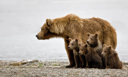

In [10]:
im = Image.open(dest)
im.to_thumb(128,128)

This seems to have worked nicely, so let's use fastai's `download_images` to download all the URLs for each of our search terms. We'll put each in a separate folder:

잘 된 것 같으니, fastai download_images 를 사용해서 각 검색어의 모든 URL을 다운로드해 봅시다. 각각을 별도의 폴더에 넣을 겁니다.

In [11]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [24]:
!rm -rf bears

In [25]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

Our folder has image files, as we'd expect:

예상했듯이 우리 폴더에는 이미지 파일이 있습니다.

In [28]:
fns = get_image_files(path)
fns

(#545) [Path('bears/grizzly/a696212b-4a4d-4dd6-997e-57f88e4b7ac3.jpg'),Path('bears/grizzly/fc3335a0-3e72-4ea2-8179-83a7ce7b1a00.jpg'),Path('bears/grizzly/8407fe28-3518-42ed-b3f6-c5d288758b2a.jpg'),Path('bears/grizzly/8f50b851-fc99-4c7b-a75c-05451407a260.jpg'),Path('bears/grizzly/432dfe1e-11d8-477f-88d9-bc8aabbf6673.jpg'),Path('bears/grizzly/534ada25-bf9c-45a8-bc42-b9b5eb2fbb41.jpg'),Path('bears/grizzly/eec5d651-b8ef-4ba2-a47c-31525e8fd868.jpg'),Path('bears/grizzly/71ae9463-33f2-40a2-9a9d-233e65b1c26a.jpg'),Path('bears/grizzly/d3533ffb-aa98-4b29-a64d-2bbcad797712.jpeg'),Path('bears/grizzly/15f9cfc1-4c8c-4195-aab3-771d47ab78cd.jpg'),Path('bears/grizzly/1d2b386b-b7cd-4431-a3d5-eb5f285f2cd3.jpg'),Path('bears/grizzly/bbb5ed9e-c0c7-4810-8356-27d6ebacc575.png'),Path('bears/grizzly/a5d52254-32fb-42a2-a02d-1d2e9a938d86.jpg'),Path('bears/grizzly/ca321171-020b-4963-be09-765bf141846b.jpg'),Path('bears/grizzly/7d468c89-9b45-4f5d-a48f-2dbd02c6a85f.jpg'),Path('bears/grizzly/6abc14f0-964c-47c7-91f7-2d

> j: I just love this about working in Jupyter notebooks! It's so easy to gradually build what I want, and check my work every step of the way. I make a _lot_ of mistakes, so this is really helpful to me...

> j: 저는 Jupyter 노트북에서 작업하는 것을 정말 좋아해요! 제가 원하는 것을 점진적으로 구축하고, 모든 단계에서 작업을 확인하는 것이 정말 쉬워요. 저는 실수를 많이 하기 때문에 이게 정말 도움이 돼요...

Often when we download files from the internet, there are a few that are corrupt. Let's check:

인터넷에서 파일을 다운로드할 때 종종 손상된 파일이 몇 개 있습니다. 확인해 보겠습니다.

In [14]:
??verify_images

In [22]:
?verify_images

In [15]:
doc(verify_images)

In [27]:
failed = verify_images(fns)
failed

(#51) [Path('bears/grizzly/b3ae4db3-71d8-4132-bdb9-89d8e52463d3.JPG'),Path('bears/grizzly/79088250-f553-45f1-9854-fd16e2985775.jpg'),Path('bears/grizzly/18ac97e1-563e-4319-b413-c59b0f9c4710.jpg'),Path('bears/grizzly/43e3e839-c434-4798-bd95-a067f634aa30.jpg'),Path('bears/grizzly/6d699a59-f5b9-451a-be22-45694e1cdfa4.jpg'),Path('bears/grizzly/5fdefeee-641d-4c38-85fc-ffd11bf0346e.jpg'),Path('bears/grizzly/065d63fb-4150-4aec-b343-e452b9075d01.jpg'),Path('bears/black/27804fde-afbd-438a-969b-37c90747e7ee.jpg'),Path('bears/black/eef961c9-6441-4a9c-bfb5-2ec291177c91.jpg'),Path('bears/black/26289d5f-961d-4a5e-b7e7-705d00ce47bf.jpg'),Path('bears/black/7cdd1dea-e003-4104-a0a6-7ba4e84ef276.jpg'),Path('bears/black/78883444-d201-475b-b188-dbe625cb1773.jpg'),Path('bears/black/56d166b8-5cc3-4ff3-adf0-98f334cc3b36.jpg'),Path('bears/black/e7bdfd77-68b6-4573-a02e-5797ace38464.jpg'),Path('bears/black/d7199d1e-de33-46c3-b479-b2379304b824.jpg'),Path('bears/black/fdd9753b-d9e4-413a-800c-addae5983865.jpg'),Pat

In [29]:
len(failed)

51

To remove all the failed images, you can use `unlink` on each of them. Note that, like most fastai functions that return a collection, `verify_images` returns an object of type `L`, which includes the `map` method. This calls the passed function on each element of the collection:

실패한 모든 이미지를 제거하려면, 각각에서 unlink 를 사용할 수 있습니다. 컬렉션을 반환하는 대부분의 fastai 함수와 마찬가지로 verify_images 는 map 메서드가 포함된 L 유형의 객체를 반환합니다. 이렇게 하면 컬렉션의 각 요소에 전달된 함수가 호출됩니다.

In [30]:
failed.map(Path.unlink);

### Sidebar: Getting Help in Jupyter Notebooks

Jupyter notebooks are great for experimenting and immediately seeing the results of each function, but there is also a lot of functionality to help you figure out how to use different functions, or even directly look at their source code. For instance, if you type in a cell:

Jupyter 노트북은 실험하고 각 함수의 결과를 즉시 보는 데 좋지만, 다양한 함수를 사용하는 방법을 알아내거나 소스 코드를 직접 보는 데 도움이 되는 많은 기능도 있습니다. 예를 들어, 셀에 다음을 입력하면:

```
??verify_images
```
a window will pop up with:

다음 내용이 담긴 창이 나타납니다.

```
Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in
             enumerate(parallel(verify_image, fns)) if not o)
File:      ~/git/fastai/fastai/vision/utils.py
Type:      function
```
This tells us what argument the function accepts (`fns`), then shows us the source code and the file it comes from. Looking at that source code, we can see it applies the function `verify_image` in parallel and only keeps the image files for which the result of that function is `False`, which is consistent with the doc string: it finds the images in `fns` that can't be opened.

이것은 함수가 어떤 인수를 받아들이는지(`fns`) 알려준 다음, 소스 코드와 출처 파일을 보여줍니다. 소스 코드를 살펴보면, 함수 verify_image 를 병렬로 적용하고 해당 함수의 결과가 False 인 이미지 파일만 유지하는데, 이는 doc 문자열 과 일치합니다: `fns` 에서 열 수 없는 이미지를 찾습니다.

Here are some other features that are very useful in Jupyter notebooks:

Jupyter Notebook에서 매우 유용한 다른 기능은 다음과 같습니다.

- At any point, if you don't remember the exact spelling of a function or argument name, you can press Tab to get autocompletion suggestions.
- When inside the parentheses of a function, pressing Shift and Tab simultaneously will display a window with the signature of the function and a short description. Pressing these keys twice will expand the documentation, and pressing them three times will open a full window with the same information at the bottom of your screen.
- In a cell, typing `?func_name` and executing will open a window with the signature of the function and a short description.
- In a cell, typing `??func_name` and executing will open a window with the signature of the function, a short description, and the source code.
- If you are using the fastai library, we added a `doc` function for you: executing `doc(func_name)` in a cell will open a window with the signature of the function, a short description and links to the source code on GitHub and the full documentation of the function in the [library docs](https://docs.fast.ai).
- Unrelated to the documentation but still very useful: to get help at any point if you get an error, type `%debug` in the next cell and execute to open the [Python debugger](https://docs.python.org/3/library/pdb.html), which will let you inspect the content of every variable.


- 언제든지 함수나 인수 이름의 정확한 철자를 기억하지 못할 경우 Tab 키를 눌러 자동 완성 제안을 받을 수 있습니다.
- 함수의 괄호 안에 있을 때 Shift와 Tab을 동시에 누르면 함수의 서명과 간단한 설명이 있는 창이 표시됩니다. 이 키를 두 번 누르면 설명서가 확장되고 세 번 누르면 화면 하단에 동일한 정보가 있는 전체 창이 열립니다.
- 셀에 `?func_name` 를 입력하고 실행하면, 함수의 서명과 짧은 설명이 있는 창이 열립니다.
- 셀에서 `??func_name` 입력하고 실행하면, 함수의 서명, 간단한 설명, 소스 코드가 있는 창이 열립니다.
- fastai 라이브러리를 사용 중이라면, 여러분을 위한 doc 함수를 추가해 드렸습니다. 셀에서 `doc(func_name)` 을 실행하면 함수 서명, 간단한 설명, GitHub의 소스 코드에 대한 링크, 라이브러리 문서 에 있는 함수의 전체 문서가 표시된 창이 열립니다 .
- 설명서와는 관련이 없지만 여전히 매우 유용한 내용: 오류가 발생할 경우 언제든지 도움을 받으려면 다음 셀에 `%debug` 를 입력하고 실행하여 Python 디버거를 열고 모든 변수의 내용을 검사할 수 있습니다.



### End sidebar

One thing to be aware of in this process: as we discussed in <<chapter_intro>>, models can only reflect the data used to train them. And the world is full of biased data, which ends up reflected in, for example, Bing Image Search (which we used to create our dataset). For instance, let's say you were interested in creating an app that could help users figure out whether they had healthy skin, so you trained a model on the results of searches for (say) "healthy skin." <<healthy_skin>> shows you the kinds of results you would get.

이 과정에서 알아두어야 할 한 가지는, < >에서 논의했듯이 모델은 학습에 사용된 데이터만 반영할 수 있다는 것입니다. 그리고 세상은 편향된 데이터로 가득 차 있으며, 이는 (우리의 데이터 세트를 만드는 데 사용되는) Bing 이미지 검색에 반영됩니다. 예를 들어, 사용자가 건강한 피부를 가지고 있는지 알아내는 데 도움이 되는 앱을 만드는 데 관심이 있다고 가정해 보겠습니다. 그래서 (예를 들어) "건강한 피부"에 대한 검색 결과에 대한 모델을 학습시켰습니다. < >는 얻을 수 있는 결과의 종류를 보여줍니다.

<img src="https://github.com/fastai/fastbook/blob/master/images/healthy_skin.gif?raw=1" width="600" caption="Data for a healthy skin detector?" id="healthy_skin">

With this as your training data, you would end up not with a healthy skin detector, but a *young white woman touching her face* detector! Be sure to think carefully about the types of data that you might expect to see in practice in your application, and check carefully to ensure that all these types are reflected in your model's source data. footnote:[Thanks to Deb Raji, who came up with the "healthy skin" example. See her paper ["Actionable Auditing: Investigating the Impact of Publicly Naming Biased Performance Results of Commercial AI Products"](https://dl.acm.org/doi/10.1145/3306618.3314244) for more fascinating insights into model bias.]

이것을 훈련 데이터로 사용하면 건강한 피부 감지기가 아닌, 얼굴을 만지는 젊은 백인 여성 감지기가 됩니다! 실제로 애플리케이션에서 볼 수 있는 데이터 유형에 대해 신중하게 생각하고, 이러한 모든 유형이 모델의 소스 데이터에 반영되었는지 신중하게 확인하세요. 각주:["건강한 피부" 사례를 생각해 낸 Deb Raji에게 감사드립니다. 모델 편향에 대한 더욱 흥미로운 통찰력을 얻으려면 그녀의 논문 "Actionable Auditing: Investigating the Impact of Publicly Naming Biased Performance Results of Commercial AI Products"를 참조하세요 .]

Now that we have downloaded some data, we need to assemble it in a format suitable for model training. In fastai, that means creating an object called `DataLoaders`.

이제 데이터를 다운로드했으니 모델 학습에 적합한 형식으로 조립해야 합니다. fastai에서는 이는 DataLoaders 라는 객체를 만드는 것을 의미합니다.

## From Data to DataLoaders

`DataLoaders` is a thin class that just stores whatever `DataLoader` objects you pass to it, and makes them available as `train` and `valid`. Although it's a very simple class, it's very important in fastai: it provides the data for your model. The key functionality in `DataLoaders` is provided with just these four lines of code (it has some other minor functionality we'll skip over for now):

DataLoaders 는 사용자가 전달한 모든 DataLoader 객체를 저장하고 이를 트레이닝 하고 유효하게 만드는 얇은 클래스입니다. 매우 간단한 클래스이지만 모델에 데이터를 제공한다는 점에서 fastai 에서 매우 중요합니다. DataLoaders 의 핵심 기능은 이 네 줄의 코드만으로 제공됩니다. (다른 사소한 기능도 있지만 지금은 생략하겠습니다):

```python
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])
```

> jargon: DataLoaders: A fastai class that stores multiple `DataLoader` objects you pass to it, normally a `train` and a `valid`, although it's possible to have as many as you like. The first two are made available as properties.

> 전문 용어: DataLoaders: 여러 DataLoader 객체를 저장하는 fastai 클래스로, 일반적으로 train 객체 1개, valid 객체 1개 이지만, 원하는 만큼 가질 수도 있습니다. 처음 두 개는 속성으로 제공됩니다.

Later in the book you'll also learn about the `Dataset` and `Datasets` classes, which have the same relationship.

이 책의 후반부에서는 동일한 관계를 갖는 Dataset 와 Datasets 클래스 에 대해서도 배우게 됩니다 .

To turn our downloaded data into a `DataLoaders` object we need to tell fastai at least four things:

다운로드한 데이터를 DataLoaders 객체로 바꾸려면 fastai 에 최소한 네 가지를 알려야 합니다.

- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set


- 우리가 어떤 종류의 데이터를 다루고 있는가
- 아이템 목록을 얻는 방법
- 이 품목에 라벨을 붙이는 방법
- 검증 세트를 만드는 방법

So far we have seen a number of *factory methods* for particular combinations of these things, which are convenient when you have an application and data structure that happen to fit into those predefined methods. For when you don't, fastai has an extremely flexible system called the *data block API*. With this API you can fully customize every stage of the creation of your `DataLoaders`. Here is what we need to create a `DataLoaders` for the dataset that we just downloaded:

지금까지 우리는 이러한 것들의 특정 조합에 대한 여러 팩토리 메서드를 살펴보았는데, 이는 미리 정의된 메서드에 맞는 애플리케이션과 데이터 구조가 있을 때 편리합니다. 맞지 않을 경우를 대비해 fastai 에는 "데이터 블록 API" 라는 매우 유연한 시스템이 있습니다. 이 API를 사용하면 DataLoaders 생성의 모든 단계를 완벽하게 사용자 지정할 수 있습니다. 방금 다운로드한 데이터 세트에 대해 DataLoaders 를 만드는 데 필요한 것은 다음과 같습니다:

In [31]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Let's look at each of these arguments in turn. First we provide a tuple where we specify what types we want for the independent and dependent variables:

여기의 각 인수를 차례로 살펴보겠습니다. 먼저 독립 변수와 종속 변수에 대해 원하는 유형을 지정하는 튜플을 제공합니다:

```python
# 1.
blocks=(ImageBlock, CategoryBlock)
```

The *independent variable* is the thing we are using to make predictions from, and the *dependent variable* is our target. In this case, our independent variables are images, and our dependent variables are the categories (type of bear) for each image. We will see many other types of block in the rest of this book.

**독립 변수** 는 우리가 예측을 하는 데 사용하는 것이고 **종속 변수는** 우리의 목표입니다. 이 경우, 우리의 독립 변수는 "이미지" 이고, 종속 변수는 각 "이미지의 범주" (곰의 종류) 입니다. 이 책의 나머지 부분에서는 다른 많은 유형의 블록을 볼 것입니다.


For this `DataLoaders` our underlying items will be file paths. We have to tell fastai how to get a list of those files. The `get_image_files` function takes a path, and returns a list of all of the images in that path (recursively, by default):

이 DataLoaders 를 위해 기반 (underlying) 항목들은 파일 경로가 됩니다. fastai 에 해당 파일 목록을 가져오는 방법을 알려줘야 합니다. 이 get_image_files 함수는 경로를 가져와 해당 경로에 있는 모든 이미지 목록을 반환합니다. (기본적으로 재귀적으로):

```python
# 2.
get_items=get_image_files
```


Often, datasets that you download will already have a validation set defined. Sometimes this is done by placing the images for the training and validation sets into different folders. Sometimes it is done by providing a CSV file in which each filename is listed along with which dataset it should be in. There are many ways that this can be done, and fastai provides a very general approach that allows you to use one of its predefined classes for this, or to write your own. In this case, however, we simply want to split our training and validation sets randomly. However, we would like to have the same training/validation split each time we run this notebook, so we fix the random seed (computers don't really know how to create random numbers at all, but simply create lists of numbers that look random; if you provide the same starting point for that list each time—called the *seed*—then you will get the exact same list each time):

다운로드한 데이터 세트에는 이미 검증 세트(validation set)가 정의되어 있는 경우가 많습니다. 때로는 학습 및 검증 세트의 이미지를 다른 폴더에 배치하여 이를 수행합니다. 때로는 각 파일 이름과 해당 데이터 세트가 있어야 하는 CSV 파일을 제공하여 이를 수행합니다. 이를 수행하는 방법에는 여러 가지가 있으며 fastai 는 이를 위해 미리 정의된 클래스 중 하나를 사용하거나 직접 작성할 수 있는 매우 일반적인 접근 방식을 제공합니다. 그러나 이 예시의 경우에는 학습 및 검증 세트를 무작위로 분할하기만 합니다. 그러나 이 노트북을 실행할 때마다 동일한 학습/검증 분할을 원하므로 난수 시드를 수정합니다. (컴퓨터는 난수를 만드는 방법을 전혀 모르지만 무작위처럼 보이는 숫자 목록을 만듭니다. 매번 해당 목록에 동일한 시작점(시드라고 함)을 제공하면 매번 정확히 동일한 목록을 얻게 됩니다).

```python
# 3.
splitter=RandomSplitter(valid_pct=0.2, seed=42)
```

The independent variable is often referred to as `x` and the dependent variable is often referred to as `y`. Here, we are telling fastai what function to call to create the labels in our dataset:

독립 변수는 종종 x 로 지칭되고, 종속 변수는 종종 y 로 지칭됩니다. 여기서 우리는 우리의 데이터 세트에서 레이블을 생성하기 위해 호출할 함수를 fastai 에 알려줍니다.

```python
# 4.
get_y=parent_label
```

`parent_label` is a function provided by fastai that simply gets the name of the folder a file is in. Because we put each of our bear images into folders based on the type of bear, this is going to give us the labels that we need.

parent_label 은 fastai 가 제공하는 기능으로, 파일이 있는 폴더의 이름을 간단히 가져옵니다. 우리는 각 곰 이미지를 곰 유형에 따라 폴더에 넣었으므로, 이를 통해 필요한 라벨을 얻을 수 있습니다.


Our images are all different sizes, and this is a problem for deep learning: we don't feed the model one image at a time but several of them (what we call a *mini-batch*). To group them in a big array (usually called a *tensor*) that is going to go through our model, they all need to be of the same size. So, we need to add a transform which will resize these images to the same size. *Item transforms* are pieces of code that run on each individual item, whether it be an image, category, or so forth. fastai includes many predefined transforms; we use the `Resize` transform here:

우리의 이미지는 모두 크기가 다르고, 이는 딥 러닝에 문제가 됩니다. 우리는 한 번에 하나의 이미지를 모델에 공급하지 않고 여러 개의 이미지를 공급합니다. ("미니 배치" 라고 부름). 모델을 통과할 큰 배열 (일반적으로 "텐서" 라고 함) 로 그룹화하려면 모두 같은 크기여야 합니다. 따라서 이러한 이미지의 크기를 같은 크기로 조정하는 변환을 추가해야 합니다. "항목 변환" (item transforms) 은 이미지, 범주 등 각 개별 항목에서 실행되는 코드 조각입니다. fastai 에는 미리 정의된 변환이 많이 포함되어 있습니다. 여기서는 Resize 변환을 사용합니다.

```python
# 5.
item_tfms=Resize(128)
```


This command has given us a `DataBlock` object. This is like a *template* for creating a `DataLoaders`. We still need to tell fastai the actual source of our data—in this case, the path where the images can be found:

```python
# 앞 코드의 반복
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),    # 1.
    get_items=get_image_files,             # 2.
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # 3.
    get_y=parent_label,                    # 4.
    item_tfms=Resize(128))                 $ 5.
```
위 명령은 우리에게 DataBlock 객체를 주었습니다. 이것은 DataLoaders 을 만드는 템플릿과 같습니다. 우리는 여전히 fastai 에게 우리 데이터의 실제 출처를 알려야 합니다. 이 경우 이미지를 찾을 수 있는 경로 (path) 입니다:

In [23]:
doc(get_image_files)

In [32]:
# 데이터 블록으로부터 데이터 로더 생성
dls = bears.dataloaders(path)

A `DataLoaders` includes validation and training `DataLoader`s. `DataLoader` is a class that provides batches of a few items at a time to the GPU. We'll be learning a lot more about this class in the next chapter. When you loop through a `DataLoader` fastai will give you 64 (by default) items at a time, all stacked up into a single tensor. We can take a look at a few of those items by calling the `show_batch` method on a `DataLoader`:

A DataLoaders 에는 검증 및 학습용 DataLoader 들이 포함됩니다. DataLoader 는 한 번에 몇 개의 항목의 배치(batches)를 GPU 에 제공하는 클래스입니다. 다음 장에서 이 클래스에 대해 더 많이 배울 것입니다. DataLoader 를 반복하면 fastai 는 한 번에 64개(기본값)의 항목을 제공하며 모두 단일 텐서로 쌓입니다. DataLoader 에서 show_batch 메서드를 호출하여 이러한 항목 중 일부를 살펴볼 수 있습니다.

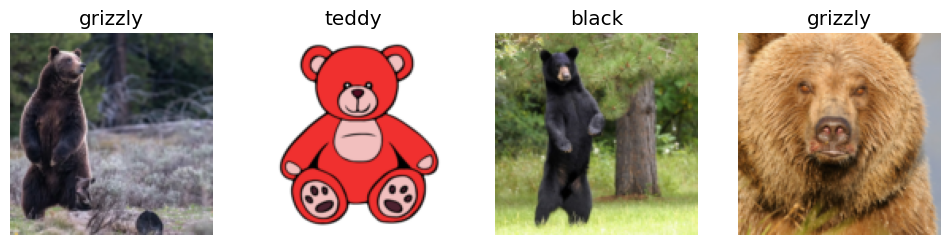

In [33]:
dls.valid.show_batch(max_n=4, nrows=1)

By default `Resize` *crops* the images to fit a square shape of the size requested, using the full width or height. This can result in losing some important details. Alternatively, you can ask fastai to pad the images with zeros (black), or squish/stretch them:

기본적으로 "Resize" 는 전체 너비 또는 높이를 사용하여 요청된 크기의 정사각형 모양에 맞게 이미지를 자릅니다.(crop). 이로 인해 일부 중요한 세부 정보가 손실될 수 있습니다. 또는 fastai 에 이미지를 0(검정색)으로 패딩하거나, 압축/늘리도록 요청할 수 있습니다.

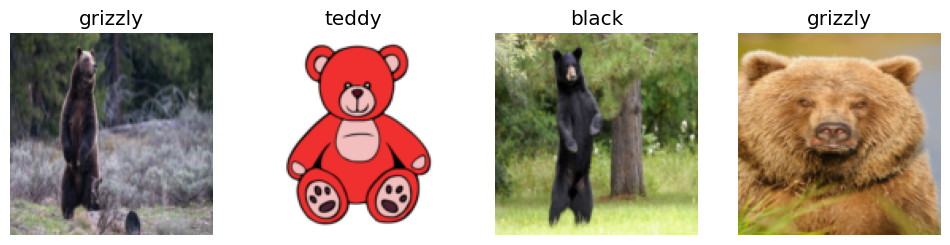

In [34]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

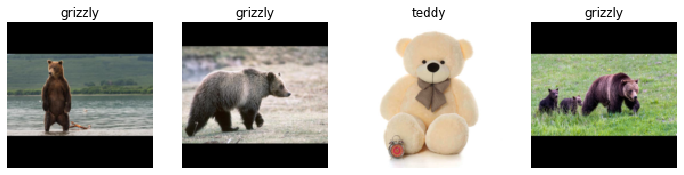

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

All of these approaches seem somewhat wasteful, or problematic. If we squish or stretch the images they end up as unrealistic shapes, leading to a model that learns that things look different to how they actually are, which we would expect to result in lower accuracy. If we crop the images then we remove some of the features that allow us to perform recognition. For instance, if we were trying to recognize breeds of dog or cat, we might end up cropping out a key part of the body or the face necessary to distinguish between similar breeds. If we pad the images then we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective resolution for the part of the image we actually use.

이러한 모든 접근 방식은 다소 낭비적이거나 문제가 있는 것처럼 보입니다. 이미지를 압축하거나 늘리면 비현실적인 모양으로 끝나서 모델이 사물이 실제와 다르게 보인다는 것을 학습하게 되는데, 이는 정확도가 낮아질 것으로 예상합니다. 이미지를 자르면 인식을 수행할 수 있는 일부 피처(특징)이 제거됩니다. 예를 들어 개나 고양이의 품종을 인식하려고 할 때, 비슷한 품종을 구별하는 데 필요한 신체 또는 얼굴의 핵심 부분이 잘려질 수 있습니다. 이미지를 패딩하면 빈 공간이 많이 생기고, 이는 모델에 대한 계산 낭비일 뿐이며 실제로 사용하는 이미지 부분의 효과적인 해상도가 낮아집니다.

Instead, what we normally do in practice is to randomly select part of the image, and crop to just that part. On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

대신, 우리가 실제로 일반적으로 하는 일은 이미지의 일부를 무작위로 선택하고 그 부분만 잘라내는 것입니다. 각 에포크(데이터 세트의 모든 이미지를 완전히 통과하는 한 번의 패스)에서 우리는 각 이미지의 다른 부분을 무작위로 선택합니다. 즉, 우리 모델은 이미지의 다른 특징에 초점을 맞추고 인식하는 법을 배울 수 있습니다. 또한 이는 실제 세계에서 이미지가 작동하는 방식을 반영합니다. 같은 사물의 다른 사진은 약간 다른 방식으로 프레이밍 될 수 있습니다.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave. It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing! So actually training the neural network with examples of images where the objects are in slightly different places and slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image.

사실, 전혀 훈련되지 않은 신경망은 이미지가 어떻게 동작하는지에 대해 전혀 모릅니다. 물체가 1도 회전해도 여전히 같은 것의 그림이라는 사실조차 인식하지 못합니다! 따라서 물체가 약간 다른 위치에 있고 크기가 약간 다른 이미지의 예를 사용하여 신경망을 실제로 훈련하면 물체가 무엇인지, 그리고 이미지에서 어떻게 표현할 수 있는지에 대한 기본 개념을 이해하는 데 도움이 됩니다.

Here's another example where we replace `Resize` with `RandomResizedCrop`, which is the transform that provides the behavior we just described. The most important parameter to pass in is `min_scale`, which determines how much of the image to select at minimum each time:

다음은 Resize 를 RandomResizedCrop 로 교체한 또 다른 예입니다. 이는 방금 설명한 동작을 제공하는 변환입니다. 전달해야 할 가장 중요한 매개변수는 min_scale 인데, 매번 최소한 이미지의 어느 정도를 선택할지 결정합니다.


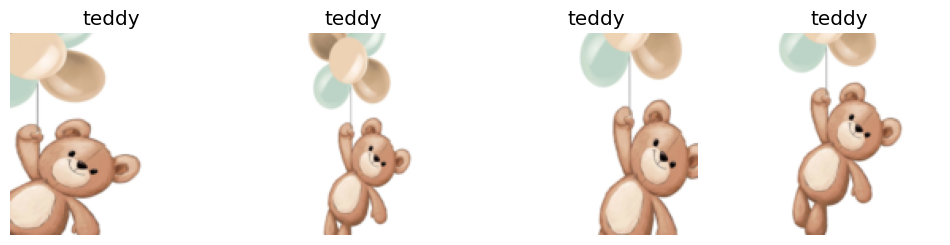

In [35]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

We used `unique=True` to have the same image repeated with different versions of this `RandomResizedCrop` transform. This is a specific example of a more general technique, called data augmentation.

우리는 "unique=True" 를 지정하여, 이 RandomResizedCrop 변환의 다른 버전으로 동일한 이미지를 반복하도록 했습니다. 이것은 "데이터 증강" (data augmentation) 이라고 불리는, 보다 일반적인 기술의 구체적인 예시 입니다.

### Data Augmentation

*Data augmentation* refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. For natural photo images such as the ones we are using here, a standard set of augmentations that we have found work pretty well are provided with the `aug_transforms` function. Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU, which will save a lot of time. To tell fastai we want to use these transforms on a batch, we use the `batch_tfms` parameter (note that we're not using `RandomResizedCrop` in this example, so you can see the differences more clearly; we're also using double the amount of augmentation compared to the default, for the same reason):

"데이터 증강"은 입력 데이터의 무작위 변형을 생성하여, 다르게 보이지만, 실제로는 데이터의 의미를 변경하지 않는 것을 말합니다. 이미지에 대한 일반적인 데이터 증강 기술의 예로는 회전, 뒤집기, 원근 왜곡, 밝기 변경 및 대비 변경이 있습니다. 여기서 사용하는 것과 같은 자연스러운 (natural) 사진 이미지의 경우, 우리가 꽤 잘 작동하는 것으로 밝혀진 표준 증강 세트가 aug_transforms 함수와 함께 제공됩니다. 이제 모든 이미지가 같은 크기이므로 GPU를 사용하여 이러한 증강을 전체 배치에 적용할 수 있으므로 많은 시간을 절약할 수 있습니다. 배치에서 이러한 변환을 사용하고자 한다는 것을 fastai 에 알리기 위해, batch_tfms 매개변수를 사용합니다. (이 예에서는 RandomResizedCrop 를 사용하지 않으므로, 차이점을 더 명확하게 볼 수 있습니다. 또한 같은 이유로 기본값에 비해 증강 양을 두 배로 사용합니다).

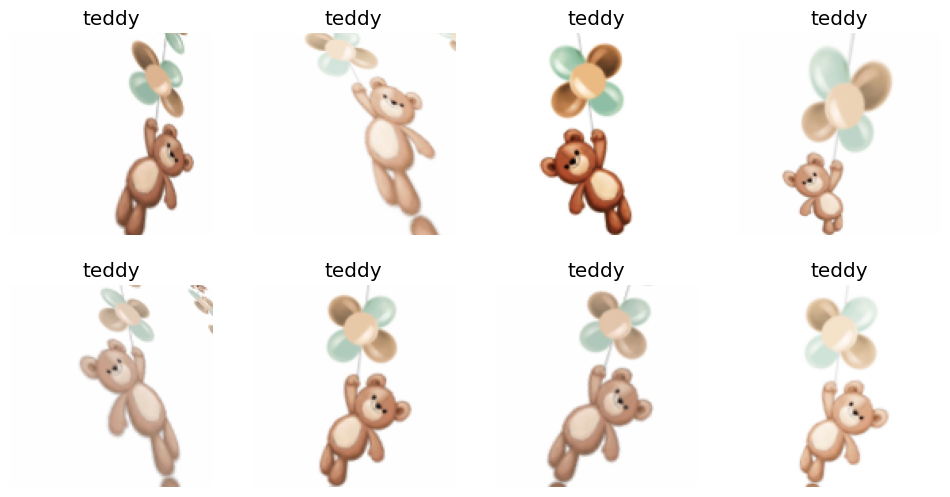

In [36]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Now that we have assembled our data in a format fit for model training, let's actually train an image classifier using it.

이제 모델 학습에 적합한 형식으로 데이터를 조립했으니, 이를 사용하여 실제로 이미지 분류기를 학습해 보겠습니다.

## Training Your Model, and Using It to Clean Your Data

Time to use the same lines of code as in <<chapter_intro>> to train our bear classifier.

chapter_intro 에 있는 동일한 코드 줄을 사용하여 곰 분류기를 훈련할 시간입니다.

We don't have a lot of data for our problem (150 pictures of each sort of bear at most), so to train our model, we'll use `RandomResizedCrop` with an image size of 224 px, which is fairly standard for image classification, and default `aug_transforms`:

우리 문제에 대한 데이터가 많지 않습니다. (각 종류의 곰 사진이 최대 150장). 따라서 모델을 훈련하기 위해 224px 크기의 이미지에 RandomResizedCrop 를 사용할 것이며 (이는 이미지 분류에 있어 표준에 가깝습니다), 기본으로 aug_transforms 도 사용합니다.

In [37]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

We can now create our `Learner` and fine-tune it in the usual way:

이제 우리는 평소와 같은 방식으로 Learner 를 생성하고 미세 조정할 수 있습니다.

In [38]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 172MB/s]


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

Now let's see whether the mistakes the model is making are mainly thinking that grizzlies are teddies (that would be bad for safety!), or that grizzlies are black bears, or something else. To visualize this, we can create a *confusion matrix*:

이제 모델이 저지르는 실수가 주로 그리즐리가 테디라고 생각하는 것인지 (이것은 안전에 좋지 않을 것입니다!), 아니면 그리즐리가 검은 곰이라고 생각하는 것인지, 아니면 다른 것인지 살펴보겠습니다. 이를 시각화하기 위해 혼동 행렬 (confusion matrix) 을 만들 수 있습니다.

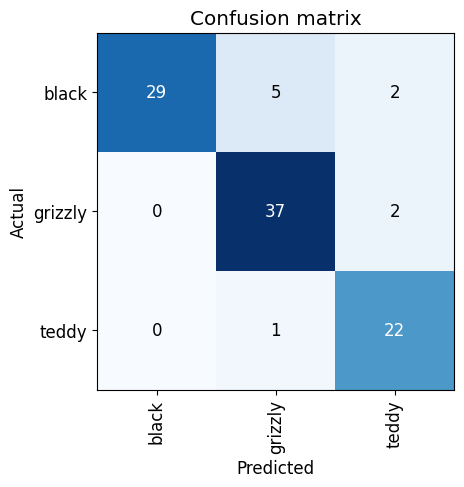

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

The rows represent all the black, grizzly, and teddy bears in our dataset, respectively. The columns represent the images which the model predicted as black, grizzly, and teddy bears, respectively. Therefore, the diagonal of the matrix shows the images which were classified correctly, and the off-diagonal cells represent those which were classified incorrectly. This is one of the many ways that fastai allows you to view the results of your model. It is (of course!) calculated using the validation set. With the color-coding, the goal is to have white everywhere except the diagonal, where we want dark blue. Our bear classifier isn't making many mistakes!

행은 각각 데이터 세트에 있는 모든 검은색, 회색곰, 테디베어를 나타냅니다. 열은 모델이 각각 검은색, 회색곰, 테디베어로 예측한 이미지를 나타냅니다. 따라서 행렬의 대각선은 올바르게 분류된 이미지를 보여주고, 대각선이 아닌 셀은 잘못 분류된 이미지를 나타냅니다. 이는 fastai 를 통해 모델의 결과를 볼 수 있는 여러 방법 중 하나입니다. 이것은 (당연히) 검증 세트를 사용하여 계산됩니다. 색상 코딩을 사용하면 대각선을 제외한 모든 곳에 흰색이 표시되는 것이 목표이며, 대각선에는 진한 파란색이 표시됩니다. 곰 분류기는 많은 실수를 하지 않습니다!

It's helpful to see where exactly our errors are occurring, to see whether they're due to a dataset problem (e.g., images that aren't bears at all, or are labeled incorrectly, etc.), or a model problem (perhaps it isn't handling images taken with unusual lighting, or from a different angle, etc.). To do this, we can sort our images by their *loss*.

오류가 정확히 어디에서 발생하는지, 데이터 세트 문제 때문인지 (예: 곰이 전혀 아닌 이미지, 잘못 레이블 지정됨 등), 아니면 모델 문제 때문인지 (특이한 조명으로 촬영한 이미지나 다른 각도에서 촬영한 이미지를 처리하지 못함 등) 확인하는 것이 도움이 됩니다. 이를 위해 이미지를 손실 (loss) 에 따라 정렬할 수 있습니다.

The loss is a number that is higher if the model is incorrect (especially if it's also confident of its incorrect answer), or if it's correct, but not confident of its correct answer. In a couple of chapters we'll learn in depth how loss is calculated and used in the training process. For now, `plot_top_losses` shows us the images with the highest loss in our dataset. As the title of the output says, each image is labeled with four things: prediction, actual (target label), loss, and probability. The *probability* here is the confidence level, from zero to one, that the model has assigned to its prediction:

손실은 모델이 틀렸을 때 (특히 모델이 틀린 답에 확신이 있을 때) 또는 모델이 맞지만 정답에 확신이 없을 때 더 높은 숫자입니다. 향후 몇 장에서 손실이 어떻게 계산되고 학습 프로세스에 사용되는지 자세히 알아보겠습니다. 지금은 plot_top_losses 가 데이터 세트에서 손실이 가장 높은 이미지를 보여줍니다. 출력 제목에서 알 수 있듯이, 각 이미지에는 예측, 실제 (타겟 레이블), 손실, 확률 의 네 가지 레이블이 지정됩니다. 여기서 "확률" 은 모델이 예측에 지정(assign)한 신뢰 수준 (0~1) 입니다.

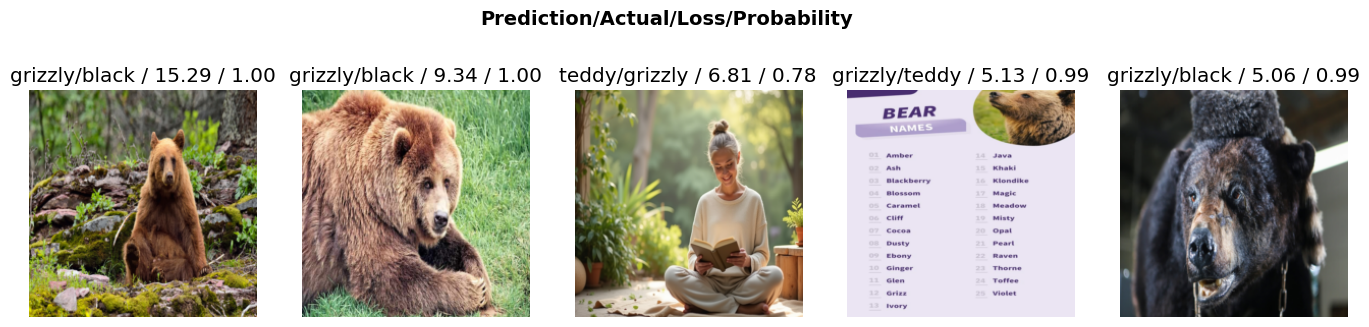

In [41]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

This output shows that the image with the highest loss is one that has been predicted as "grizzly" with high confidence. However, it's labeled (based on our Bing image search) as "black." We're not bear experts, but it sure looks to us like this label is incorrect! We should probably change its label to "grizzly."

이 출력은 가장 큰 손실이 있는 이미지가 높은 신뢰도로 "grizzly" 로 예측된 ​​이미지라는 것을 보여줍니다. (주: 위 그림에서 첫번째 이미지). 그러나 Bing 이미지 검색에 따르면 "black" 으로 레이블이 지정되었습니다. 우리는 곰 전문가는 아니지만 이 레이블이 잘못된 것 같습니다! 아마도 레이블을 "grizzly" 로 변경해야 할 것입니다.

The intuitive approach to doing data cleaning is to do it *before* you train a model. But as you've seen in this case, a model can actually help you find data issues more quickly and easily. So, we normally prefer to train a quick and simple model first, and then use it to help us with data cleaning.

데이터 정리를 하는 직관적인 접근 방식은 모델을 훈련하기 전에 정리를 하는 것입니다. 하지만 이 사례에서 보았듯이, 모델은 실제로 데이터의 문제를 더 빠르고 쉽게 찾는 데 도움이 될 수 있습니다. 따라서 일반적으로 빠르고 간단한 모델을 먼저 훈련한 다음 데이터 정리를 돕는 데 사용하는 것을 선호합니다.

fastai includes a handy GUI for data cleaning called `ImageClassifierCleaner` that allows you to choose a category and the training versus validation set and view the highest-loss images (in order), along with menus to allow images to be selected for removal or relabeling:

fastai 에는 ImageClassifierCleaner 라고 하는 데이터 정리를 위한 편리한 GUI가 포함되어 있어서, 범주와 훈련 세트 대 검증 세트를 선택하고 가장 손실이 큰 이미지를 순서대로 볼 수 있으며, 이미지를 선택해 제거하거나 다시 레이블을 지정할 수 있는 메뉴도 있습니다.

In [42]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


<img alt="Cleaner widget" width="700" src="https://github.com/fastai/fastbook/blob/master/images/att_00007.png?raw=1">

In [43]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

We can see that amongst our "black bears" is an image that contains two bears: one grizzly, one black. So, we should choose `<Delete>` in the menu under this image. `ImageClassifierCleaner` doesn't actually do the deleting or changing of labels for you; it just returns the indices of items to change. So, for instance, to delete (`unlink`) all images selected for deletion, we would run:

"검은 곰" 중에 두 마리의 곰이 포함된 이미지가 있는 것을 볼 수 있습니다. 하나는 회색곰이고 하나는 검은색곰입니다. 따라서 이미지 아래의 메뉴에서 "Delete" 를 선택해야 합니다. ImageClassifierCleaner 는 실제로 레이블을 삭제하거나 변경하지는 않습니다. 변경할 항목의 인덱스만 반환합니다. 예를 들어, 선택된 모든 이미지를 삭제 (unlink) 하려면 다음을 실행합니다.

```python
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
```

To move images for which we've selected a different category, we would run:

다른 카테고리를 선택한 이미지를 이동하려면 다음을 실행합니다.

```python
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```


> s: Cleaning the data and getting it ready for your model are two of the biggest challenges for data scientists; they say it takes 90% of their time. The fastai library aims to provide tools that make it as easy as possible.

> s: 데이터 정리와 모델 준비는 데이터 과학자에게 가장 큰 과제 두 가지입니다. 그들은 이것이 시간의 90%를 차지한다고 말합니다. fastai 라이브러리는 이를 가능한 한 쉽게 만드는 도구를 제공하는 것을 목표로 합니다.

We'll be seeing more examples of model-driven data cleaning throughout this book. Once we've cleaned up our data, we can retrain our model. Try it yourself, and see if your accuracy improves!

이 책 전반에 걸쳐 모델 기반 데이터 정리의 더 많은 예를 볼 수 있습니다. 데이터를 정리한 후에는 모델을 다시 학습할 수 있습니다. 직접 시도해보고 정확도가 향상되는지 확인하세요!

> note: No Need for Big Data: After cleaning the dataset using these steps, we generally are seeing 100% accuracy on this task. We even see that result when we download a lot fewer images than the 150 per class we're using here. As you can see, the common complaint that _you need massive amounts of data to do deep learning_ can be a very long way from the truth!

> 참고: 빅데이터 필요 없음: 이러한 단계를 사용하여 데이터 세트를 정리한 후 일반적으로 이 작업에서 100% 의 정확도를 보고 있습니다. 여기서 사용하는 클래스당 150개보다 훨씬 적은 이미지를 다운로드했을 때도 그 결과를 볼 수 있습니다. 보시다시피, 딥 러닝을 하려면 엄청난 양의 데이터가 필요하다는 일반적인 불평은 진실과는 거리가 멉니다!

Now that we have trained our model, let's see how we can deploy it to be used in practice.

이제 모델을 훈련했으니, 이를 실제로 사용하는 방법을 살펴보겠습니다.

## Turning Your Model into an Online Application

We are now going to look at what it takes to turn this model into a working online application. We will just go as far as creating a basic working prototype; we do not have the scope in this book to teach you all the details of web application development generally.

이제 이 모델을 작동하는 온라인 애플리케이션으로 전환하는 데 필요한 사항을 살펴보겠습니다. 기본적인 작동 프로토타입을 만드는 데까지만 하겠습니다. 이 책에서는 일반적으로 웹 애플리케이션 개발의 모든 세부 사항을 가르쳐 드릴 수 있는 범위가 없습니다.

### Using the Model for Inference

Once you've got a model you're happy with, you need to save it, so that you can then copy it over to a server where you'll use it in production. Remember that a model consists of two parts: the *architecture* and the trained *parameters*. The easiest way to save the model is to save both of these, because that way when you load a model you can be sure that you have the matching architecture and parameters. To save both parts, use the `export` method.

만족스러운 모델을 얻었으면, 저장해야 합니다. 그러면 프로덕션에서 사용할 서버로 복사할 수 있습니다. 모델은 "아키텍처" 와 "학습된 매개변수" 라는 두 부분으로 구성되어 있다는 점을 기억하세요. 모델을 저장하는 가장 쉬운 방법은 이 두 가지를 모두 저장하는 것입니다. 이렇게 하면 모델을 로드할 때 일치하는 아키텍처와 매개변수가 있는지 확인할 수 있기 때문입니다. 두 부분을 모두 저장하려면 이 export 메소드를 사용하세요.

This method even saves the definition of how to create your `DataLoaders`. This is important, because otherwise you would have to redefine how to transform your data in order to use your model in production. fastai automatically uses your validation set `DataLoader` for inference by default, so your data augmentation will not be applied, which is generally what you want.

이 메소드는 심지어 여러분의 DataLoaders 을 생성하는 방법에 대한 정의도 저장합니다. 이것은 중요합니다. 이 정보가 없다면 프로덕션에서 모델을 사용하기 위해 데이터를 변환하는 방법을 다시 정의해야 하기 때문입니다. fastai 기본적으로 추론을 위해 여러분의 검증 세트 DataLoader 를 자동으로 사용하므로 데이터 증강이 적용되지 않습니다. 이는 일반적으로 원하는 것입니다.

When you call `export`, fastai will save a file called "export.pkl":

export 를 호출하면, fastai는 "export.pkl" 이라는 파일을 저장합니다.

In [ ]:
learn.export()

Let's check that the file exists, by using the `ls` method that fastai adds to Python's `Path` class:

fastai 가 Python Path 클래스에 추가한 ls 메서드를 사용하여, 파일이 존재하는지 확인해 보겠습니다.

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

You'll need this file wherever you deploy your app to. For now, let's try to create a simple app within our notebook.

앱을 배포하는 모든 곳에서 이 파일이 필요합니다. 지금은 노트북 내에서 간단한 앱을 만들어 보겠습니다.

When we use a model for getting predictions, instead of training, we call it *inference*. To create our inference learner from the exported file, we use `load_learner` (in this case, this isn't really necessary, since we already have a working `Learner` in our notebook; we're just doing it here so you can see the whole process end-to-end):

훈련이 아닌 예측을 위해 모델을 사용할 때, 우리는 그것을 추론 (inference) 이라고 부릅니다. 익스포트 된 파일로부터 추론 학습기(inference learner)를 만들려면, 우리는 load_learner 를 사용합니다.  (이 경우, 우리는 이미 노트북에 이미 동작중인 Learner 가 있으므로 실제로 필요하지 않습니다. 우리는 여러분이 전체 프로세스를 처음부터 끝까지 볼 수 있도록 여기서 그렇게 할 뿐입니다):

In [ ]:
learn_inf = load_learner(path/'export.pkl')

When we're doing inference, we're generally just getting predictions for one image at a time. To do this, pass a filename to `predict`:

추론을 할 때는, 일반적으로 한 번에 한 이미지에 대한 예측만 받습니다. 이렇게 하려면 파일 이름을 predict 에 전달합니다.

In [ ]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([9.0767e-06, 9.9999e-01, 1.5748e-07]))

This has returned three things: the predicted category in the same format you originally provided (in this case that's a string), the index of the predicted category, and the probabilities of each category. The last two are based on the order of categories in the *vocab* of the `DataLoaders`; that is, the stored list of all possible categories. At inference time, you can access the `DataLoaders` as an attribute of the `Learner`:

이것은 세 가지를 반환했습니다. 원래 제공한 것과 같은 형식의 예측된 범주(이 경우 문자열), 예측된 범주의 인덱스, 각 범주의 확률입니다. 마지막 두 가지는 DataLoaders 의 어휘(vocab)에 있는 범주의 순서를 기반으로 합니다. 즉, 모든 가능한 범주의 저장된 목록입니다. 추론 시간에 Learner 의 속성으로 DataLoaders 에 액세스할 수 있습니다.

In [ ]:
learn_inf.dls.vocab

(#3) ['black','grizzly','teddy']

We can see here that if we index into the vocab with the integer returned by `predict` then we get back "grizzly," as expected. Also, note that if we index into the list of probabilities, we see a nearly 1.00 probability that this is a grizzly.

여기서 '예측'이 반환한 정수를 사용하여 어휘를 색인하면 예상대로 'grizzly'가 반환되는 것을 볼 수 있습니다. 또한 확률 목록으로 색인을 생성하면 이것이 그리즐리일 확률이 거의 1.00에 가깝다는 것을 알 수 있습니다.

We know how to make predictions from our saved model, so we have everything we need to start building our app. We can do it directly in a Jupyter notebook.

우리는 저장된 모델에서 예측을 하는 방법을 알고 있으므로 앱 빌드를 시작하는 데 필요한 모든 것을 갖추고 있습니다. Jupyter 노트북에서 직접 할 수 있습니다.

### Creating a Notebook App from the Model

To use our model in an application, we can simply treat the `predict` method as a regular function. Therefore, creating an app from the model can be done using any of the myriad of frameworks and techniques available to application developers.

애플리케이션에서 모델을 사용하려면 predict 메서드를 일반 함수로 취급하면 됩니다. 따라서 애플리케이션 개발자에게 제공되는 수많은 프레임워크와 기술을 사용하여 모델에서 앱을 만들 수 있습니다.

However, most data scientists are not familiar with the world of web application development. So let's try using something that you do, at this point, know: it turns out that we can create a complete working web application using nothing but Jupyter notebooks! The two things we need to make this happen are:

하지만 대부분의 데이터 과학자는 웹 애플리케이션 개발의 세계에 익숙하지 않습니다. 그러니 지금 당장 알고 있는 것을 사용해 봅시다. Jupyter 노트북만 있으면 완벽하게 작동하는 웹 애플리케이션을 만들 수 있다는 것이 밝혀졌습니다! 이를 실현하기 위해 필요한 두 가지 사항은 다음과 같습니다.

- IPython widgets (ipywidgets)
- Voilà

*IPython widgets* are GUI components that bring together JavaScript and Python functionality in a web browser, and can be created and used within a Jupyter notebook. For instance, the image cleaner that we saw earlier in this chapter is entirely written with IPython widgets. However, we don't want to require users of our application to run Jupyter themselves.

"IPython 위젯" 은 웹 브라우저에서 JavaScript 와 Python 기능을 결합한 GUI 구성 요소이며 Jupyter 노트북 내에서 생성 및 사용할 수 있습니다. 예를 들어, 이 장에서 앞서 본 이미지 클리너는 전적으로 IPython 위젯으로 작성되었습니다. 그러나 우리는 애플리케이션 사용자가 직접 Jupyter 를 실행하도록 요구하고 싶지 않습니다.

That is why *Voilà* exists. It is a system for making applications consisting of IPython widgets available to end users, without them having to use Jupyter at all. Voilà is taking advantage of the fact that a notebook _already is_ a kind of web application, just a rather complex one that depends on another web application: Jupyter itself. Essentially, it helps us automatically convert the complex web application we've already implicitly made (the notebook) into a simpler, easier-to-deploy web application, which functions like a normal web application rather than like a notebook.

이것이 바로 Voilà 가 존재하는 이유입니다. Voilà 는 Jupyter를 전혀 사용하지 않고도 최종 사용자에게 IPython 위젯으로 구성된 애플리케이션을 제공하는 시스템입니다. Voilà 는 노트북이 이미 일종의 웹 애플리케이션이라는 사실을 이용하고 있으며, 다른 웹 애플리케이션인 Jupyter 자체에 의존하는 다소 복잡한 애플리케이션일 뿐입니다. 기본적으로, 이미 암묵적으로 만든 복잡한 웹 애플리케이션(노트북)을 더 간단하고 배포하기 쉬운 웹 애플리케이션으로 자동 변환하는 데 도움이 되며, 노트북처럼 기능하는 것이 아니라 일반 웹 애플리케이션처럼 기능합니다.

But we still have the advantage of developing in a notebook, so with ipywidgets, we can build up our GUI step by step. We will use this approach to create a simple image classifier. First, we need a file upload widget:

하지만 우리는 여전히 노트북에서 개발하는 이점이 있으므로, ipywidgets 를 사용하여 GUI를 단계별로 빌드할 수 있습니다. 이 접근 방식을 사용하여 간단한 이미지 분류기를 만들 것입니다. 먼저 파일 업로드 위젯이 필요합니다.

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

<img alt="An upload button" width="159" src="https://github.com/fastai/fastbook/blob/master/images/att_00008.png?raw=1">

Now we can grab the image:

이제 이미지를 가져올 수 있습니다.

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

<img alt="Output widget representing the image" width="117" src="https://github.com/fastai/fastbook/blob/master/images/att_00009.png?raw=1">

We can use an `Output` widget to display it:

Output 위젯을 사용해 표시 할 수 있습니다.

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

<img alt="Output widget representing the image" width="117" src="https://github.com/fastai/fastbook/blob/master/images/att_00009.png?raw=1">

Then we can get our predictions:

그러면 우리는 예측을 얻을 수 있습니다.

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

and use a `Label` to display them:

그리고 Label 를 사용하여 표시합니다:

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

`Prediction: grizzly; Probability: 1.0000`

We'll need a button to do the classification. It looks exactly like the upload button:

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

We'll also need a *click event handler*; that is, a function that will be called when it's pressed. We can just copy over the lines of code from above:

클릭 이벤트 핸들러 도 필요합니다. 즉, 눌렀을 때 호출되는 함수입니다. 위의 코드 줄을 복사하면 됩니다.

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

You can test the button now by pressing it, and you should see the image and predictions update automatically!

지금 버튼을 눌러서 테스트해보세요. 이미지와 예측이 자동으로 업데이트되는 것을 볼 수 있을 거예요!

We can now put them all in a vertical box (`VBox`) to complete our GUI:

이제 우리는 이 모든 것을 수직 상자(VBox)에 넣어 GUI를 완성할 수 있습니다.


In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

<img alt="The whole widget" width="233" src="https://github.com/fastai/fastbook/blob/master/images/att_00011.png?raw=1">

We have written all the code necessary for our app. The next step is to convert it into something we can deploy.

우리는 앱에 필요한 모든 코드를 작성했습니다. 다음 단계는 그것을 배포할 수 있는 것으로 변환하는 것입니다.

### Turning Your Notebook into a Real App

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila

Now that we have everything working in this Jupyter notebook, we can create our application. To do this, start a new notebook and add to it only the code needed to create and show the widgets that you need, and markdown for any text that you want to appear. Have a look at the *bear_classifier* notebook in the book's repo to see the simple notebook application we created.

이제 Jupyter 노트북에서 모든 것이 작동하므로 애플리케이션을 만들 수 있습니다. 이를 위해 새 노트북을 시작하고 필요한 위젯을 만들고 표시하는 데 필요한 코드만 추가하고 표시하려는 텍스트에 대한 마크다운을 추가합니다. 책의 repo 에 있는 bear_classifier 노트북을 살펴보면 우리가 만든 간단한 노트북 애플리케이션을 볼 수 있습니다.

Next, install Voilà if you haven't already, by copying these lines into a notebook cell and executing it:

다음으로, 아직 Voilà를 설치하지 않았다면 다음 줄을 노트북 셀에 복사하고 실행하여 설치하세요.

    !pip install voila
    !jupyter serverextension enable --sys-prefix voila

Cells that begin with a `!` do not contain Python code, but instead contain code that is passed to your shell (bash, Windows PowerShell, etc.). If you are comfortable using the command line, which we'll discuss more later in this book, you can of course simply type these two lines (without the `!` prefix) directly into your terminal. In this case, the first line installs the `voila` library and application, and the second connects it to your existing Jupyter notebook.

"!" 로 시작하는 셀은 Python 코드를 포함하지 않지만, 대신 셸(bash, Windows PowerShell 등)에 전달되는 코드를 포함합니다. 이 책에서 나중에 더 자세히 설명할 명령줄을 사용하는 데 익숙하다면, 물론 이 두 줄(!접두사 없이)을 터미널에 직접 입력할 수 있습니다. 이 경우 첫 번째 줄은 voila 라이브러리와 애플리케이션을 설치하고 두 번째 줄은 이를 기존 Jupyter 노트북에 연결합니다.

Voilà runs Jupyter notebooks just like the Jupyter notebook server you are using now does, but it also does something very important: it removes all of the cell inputs, and only shows output (including ipywidgets), along with your markdown cells. So what's left is a web application! To view your notebook as a Voilà web application, replace the word "notebooks" in your browser's URL with: "voila/render". You will see the same content as your notebook, but without any of the code cells.

Voilà 는 현재 사용 중인 Jupyter 노트북 서버와 마찬가지로 Jupyter 노트북을 실행하지만, 매우 중요한 작업도 수행합니다. 모든 셀 입력을 제거하고 마크다운 셀과 함께 출력 (ipywidget 포함) 만 표시합니다. 따라서 남은 것은 웹 애플리케이션입니다! 노트북을 Voilà 웹 애플리케이션으로 보려면 브라우저 URL에서 "notebooks" 라는 단어를 "voila/render" 로 바꾸세요. 노트북과 동일한 콘텐츠가 표시되지만 코드 셀은 표시되지 않습니다.

Of course, you don't need to use Voilà or ipywidgets. Your model is just a function you can call (`pred,pred_idx,probs = learn.predict(img)`), so you can use it with any framework, hosted on any platform. And you can take something you've prototyped in ipywidgets and Voilà and later convert it into a regular web application. We're showing you this approach in the book because we think it's a great way for data scientists and other folks that aren't web development experts to create applications from their models.

물론 Voilà 나 ipywidgets 를 사용할 필요는 없습니다. 모델은 호출할 수 있는 함수일 뿐이므로 (pred,pred_idx,probs = learn.predict(img)) 모든 플랫폼에서 호스팅되는 모든 프레임워크와 함께 사용할 수 있습니다. 그리고 ipywidgets 와 Voilà 에서 프로토타입을 만든 것을 가져와 나중에 일반 웹 애플리케이션으로 변환할 수 있습니다. 이 책에서 이 접근 방식을 보여드리는 이유는 데이터 과학자와 웹 개발 전문가가 아닌 다른 사람들이 모델에서 애플리케이션을 만드는 좋은 방법이라고 생각하기 때문입니다.

We have our app, now let's deploy it!

앱이 완성되었으니, 이제 배포해 보겠습니다!

### Deploying your app

As you now know, you need a GPU to train nearly any useful deep learning model. So, do you need a GPU to use that model in production? No! You almost certainly *do not need a GPU to serve your model in production*. There are a few reasons for this:

이제 알다시피, 거의 모든 유용한 딥 러닝 모델을 훈련하려면 GPU 가 필요합니다. 그렇다면 프로덕션에서 해당 모델을 사용하려면 GPU 가 필요할까요? 아니요! 프로덕션에서 모델을 제공하는 데 GPU 가 필요하지 않을 가능성이 매우 높습니다. 그 이유는 다음과 같습니다.

- As we've seen, GPUs are only useful when they do lots of identical work in parallel. If you're doing (say) image classification, then you'll normally be classifying just one user's image at a time, and there isn't normally enough work to do in a single image to keep a GPU busy for long enough for it to be very efficient. So, a CPU will often be more cost-effective.
- An alternative could be to wait for a few users to submit their images, and then batch them up and process them all at once on a GPU. But then you're asking your users to wait, rather than getting answers straight away! And you need a high-volume site for this to be workable. If you do need this functionality, you can use a tool such as Microsoft's [ONNX Runtime](https://github.com/microsoft/onnxruntime), or [AWS Sagemaker](https://aws.amazon.com/sagemaker/)
- The complexities of dealing with GPU inference are significant. In particular, the GPU's memory will need careful manual management, and you'll need a careful queueing system to ensure you only process one batch at a time.
- There's a lot more market competition in CPU than GPU servers, as a result of which there are much cheaper options available for CPU servers.


- 우리가 보았듯이 GPU는 병렬로 많은 동일한 작업을 수행할 때만 유용합니다. (예를 들어) 이미지 분류를 수행하는 경우 일반적으로 한 번에 한 사용자의 이미지만 분류하게 되고, 일반적으로 "단일 이미지"에서 GPU를 매우 효율적으로 사용할 만큼 오랫동안 바쁘게 유지할 만큼 충분한 작업이 없습니다. 따라서 CPU가 종종 더 비용 효율적일 것입니다.
- 대안은 몇몇 사용자가 이미지를 제출할 때까지 기다린 다음, 이를 일괄 처리하여 GPU에서 한꺼번에 처리하는 것입니다. 하지만 그러면 사용자에게 기다리라고 요청하는 것이지, 바로 답변을 받는 것이 아닙니다! 그리고 이를 실행하려면 대용량 사이트가 필요합니다. 이 기능이 필요하다면 Microsoft의 ONNX Runtime 또는 AWS Sagemaker 와 같은 도구를 사용할 수 있습니다.
- GPU 추론을 처리하는 복잡성은 상당합니다. 특히 GPU의 메모리는 신중한 수동 관리가 필요하며, 한 번에 하나의 배치만 처리하도록 보장하기 위해 신중한 대기열 시스템이 필요합니다.
- CPU 서버는 GPU 서버보다 시장 경쟁이 훨씬 심하기 때문에 CPU 서버에서는 훨씬 저렴한 옵션을 선택할 수 있습니다.

Because of the complexity of GPU serving, many systems have sprung up to try to automate this. However, managing and running these systems is also complex, and generally requires compiling your model into a different form that's specialized for that system. It's typically preferable to avoid dealing with this complexity until/unless your app gets popular enough that it makes clear financial sense for you to do so.

GPU 서빙의 복잡성 때문에 이를 자동화하려는 많은 시스템이 생겨났습니다. 그러나 이러한 시스템을 관리하고 실행하는 것도 복잡하며 일반적으로 해당 시스템에 특화된 다른 형태로 모델을 컴파일해야 합니다. 일반적으로 앱이 인기를 얻어 그렇게 하는 것이 재정적으로 합리적이라고 분명해질 때까지 이러한 복잡성을 다루는 것을 피하는 것이 좋습니다.

For at least the initial prototype of your application, and for any hobby projects that you want to show off, you can easily host them for free. The best place and the best way to do this will vary over time, so check the [book's website](https://book.fast.ai/) for the most up-to-date recommendations. As we're writing this book in early 2020 the simplest (and free!) approach is to use [Binder](https://mybinder.org/). To publish your web app on Binder, you follow these steps:

최소한 애플리케이션의 초기 프로토타입과, 자랑하고 싶은 취미 프로젝트의 경우, 무료로 쉽게 호스팅할 수 있습니다. 이를 수행하는 가장 좋은 장소와 방법은 시간이 지남에 따라 달라지므로 최신 권장 사항은 책의 웹사이트에서 확인하세요. 2020년 초에 이 책을 쓰고 있으므로 가장 간단한(그리고 무료!) 접근 방식은 Binder 를 사용하는 것입니다 . Binder 에 웹 앱을 게시하려면 다음 단계를 따르세요.

1. Add your notebook to a [GitHub repository](http://github.com/).
2. Paste the URL of that repo into Binder's URL, as shown in <<deploy-binder>>.
3. Change the File dropdown to instead select URL.
4. In the "URL to open" field, enter `/voila/render/name.ipynb` (replacing `name` with the name of for your notebook).
5. Click the clickboard button at the bottom right to copy the URL and paste it somewhere safe.
6. Click Launch.


1. GitHub 저장소 에 노트북을 추가하세요 .
2. 'deploy-binder' 에 표시된 대로 해당 repo의 URL을 Binder 의 URL에 붙여넣습니다.
3. 파일 드롭다운을 변경하여 URL을 선택합니다.
4. "URL to open" 필드에, /voila/render/name.ipynb 를 입력합니다. (name 을 여러분의 노트북 이름으로 대체)
5. 오른쪽 하단의 클립보드 버튼을 클릭해 URL을 복사해 안전한 곳에 붙여넣으세요.
6. 실행을 클릭하세요.

<img alt="Deploying to Binder" width="800" caption="Deploying to Binder" id="deploy-binder" src="https://github.com/fastai/fastbook/blob/master/images/att_00001.png?raw=1">

The first time you do this, Binder will take around 5 minutes to build your site. Behind the scenes, it is finding a virtual machine that can run your app, allocating storage, collecting the files needed for Jupyter, for your notebook, and for presenting your notebook as a web application.

처음 이 작업을 수행하면 Binder 가 사이트를 빌드하는 데 약 5분이 걸립니다. 백그라운드에서는 앱을 실행할 수 있는 가상 머신을 찾고, 스토리지를 할당하고, Jupyter, 노트북 및 노트북을 웹 애플리케이션으로 표시하는 데 필요한 파일을 수집합니다.

Finally, once it has started the app running, it will navigate your browser to your new web app. You can share the URL you copied to allow others to access your app as well.

마지막으로, 앱이 실행되기 시작하면 브라우저를 새 웹 앱으로 이동합니다. 복사한 URL을 공유하여 다른 사람도 앱에 액세스할 수 있도록 할 수 있습니다.

For other (both free and paid) options for deploying your web app, be sure to take a look at the [book's website](https://book.fast.ai/).

웹앱을 배포하기 위한 다른 옵션(무료 및 유료)에 대해서는 책의 웹사이트를 꼭 살펴보세요.

You may well want to deploy your application onto mobile devices, or edge devices such as a Raspberry Pi. There are a lot of libraries and frameworks that allow you to integrate a model directly into a mobile application. However, these approaches tend to require a lot of extra steps and boilerplate, and do not always support all the PyTorch and fastai layers that your model might use. In addition, the work you do will depend on what kind of mobile devices you are targeting for deployment—you might need to do some work to run on iOS devices, different work to run on newer Android devices, different work for older Android devices, etc. Instead, we recommend wherever possible that you deploy the model itself to a server, and have your mobile or edge application connect to it as a web service.

모바일 기기나 Raspberry Pi 와 같은 에지 기기에 애플리케이션을 배포하고 싶을 수도 있습니다. 모델을 모바일 애플리케이션에 직접 통합할 수 있는 라이브러리와 프레임워크가 많이 있습니다. 그러나 이러한 접근 방식은 많은 추가 단계와 보일러플레이트가 필요한 경향이 있으며, 모델에서 사용할 수 있는 모든 PyTorch 및 fastai 계층을 항상 지원하지는 않습니다. 또한 수행하는 작업은 배포를 대상으로 하는 모바일 기기의 종류에 따라 달라집니다. iOS 기기에서 실행하려면 일부 작업을 해야 할 수도 있고, 최신 Android 기기에서 실행하려면 다른 작업을 해야 할 수도 있고, 이전 Android 기기에서는 다른 작업을 해야 할 수도 있습니다. 대신 가능한 한 모델 자체를 서버에 배포하고 모바일 또는 에지 애플리케이션이 웹 서비스로 연결되도록 하는 것이 좋습니다.

There are quite a few upsides to this approach. The initial installation is easier, because you only have to deploy a small GUI application, which connects to the server to do all the heavy lifting. More importantly perhaps, upgrades of that core logic can happen on your server, rather than needing to be distributed to all of your users. Your server will have a lot more memory and processing capacity than most edge devices, and it is far easier to scale those resources if your model becomes more demanding. The hardware that you will have on a server is also going to be more standard and more easily supported by fastai and PyTorch, so you don't have to compile your model into a different form.

이 접근 방식에는 꽤 많은 장점이 있습니다. 초기 설치가 더 쉽습니다. 모든 무거운 작업을 수행하기 위해 서버에 연결하는 작은 GUI 애플리케이션만 배포하면 되기 때문입니다. 아마도 더 중요한 점은, 모든 사용자에게 배포할 필요 없이 서버에서 해당 핵심 로직을 업그레이드할 수 있다는 것입니다. 서버는 대부분의 에지 장치보다 훨씬 더 많은 메모리와 처리 용량을 갖추고 있으며, 모델이 더 요구 사항이 많아지면 해당 리소스를 확장하기가 훨씬 쉽습니다. 서버에 있는 하드웨어도 더 표준적이고 fastai 와 PyTorch 에서 더 쉽게 지원되므로 모델을 다른 형태로 컴파일할 필요가 없습니다.

There are downsides too, of course. Your application will require a network connection, and there will be some latency each time the model is called. (It takes a while for a neural network model to run anyway, so this additional network latency may not make a big difference to your users in practice. In fact, since you can use better hardware on the server, the overall latency may even be less than if it were running locally!) Also, if your application uses sensitive data then your users may be concerned about an approach which sends that data to a remote server, so sometimes privacy considerations will mean that you need to run the model on the edge device (it may be possible to avoid this by having an *on-premise* server, such as inside a company's firewall). Managing the complexity and scaling the server can create additional overhead too, whereas if your model runs on the edge devices then each user is bringing their own compute resources, which leads to easier scaling with an increasing number of users (also known as *horizontal scaling*).

물론 단점도 있습니다. 애플리케이션에는 네트워크 연결이 필요하고 모델이 호출될 때마다 약간의 지연이 발생합니다. (어쨌든 신경망 모델을 실행하는 데는 시간이 걸리므로 이 추가 네트워크 지연은 실제로 사용자에게 큰 차이를 가져오지 않을 수 있습니다. 사실, 서버에서 더 나은 하드웨어를 사용할 수 있으므로 전체 지연은 로컬에서 실행하는 경우보다 더 짧을 수도 있습니다!) 또한 애플리케이션에서 민감한 데이터를 사용하는 경우 사용자는 해당 데이터를 원격 서버로 전송하는 방법에 대해 우려할 수 있으므로, 때로는 개인 정보 보호 고려 사항으로 인해 에지 장치에서 모델을 실행해야 할 수 있습니다. (회사 방화벽 내부와 같이 온프레미스 서버를 두어 이를 피할 수 있음). 복잡성을 관리하고 서버를 확장하면 추가 오버헤드도 발생할 수 있지만, 모델이 에지 장치에서 실행되는 경우 각 사용자가 자체 컴퓨팅 리소스를 가져와 사용자 수가 증가함에 따라 확장이 더 쉬워집니다. (수평 확장 이라고도 함).

> A: I've had a chance to see up close how the mobile ML landscape is changing in my work. We offer an iPhone app that depends on computer vision, and for years we ran our own computer vision models in the cloud. This was the only way to do it then since those models needed significant memory and compute resources and took minutes to process inputs. This approach required building not only the models (fun!) but also the infrastructure to ensure a certain number of "compute worker machines" were absolutely always running (scary), that more machines would automatically come online if traffic increased, that there was stable storage for large inputs and outputs, that the iOS app could know and tell the user how their job was doing, etc. Nowadays Apple provides APIs for converting models to run efficiently on device and most iOS devices have dedicated ML hardware, so that's the strategy we use for our newer models. It's still not easy but in our case it's worth it, for a faster user experience and to worry less about servers. What works for you will depend, realistically, on the user experience you're trying to create and what you personally find is easy to do. If you really know how to run servers, do it. If you really know how to build native mobile apps, do that. There are many roads up the hill.

> A: 저는 제 업무에서 모바일 ML 환경이 어떻게 변화하고 있는지 가까이서 볼 기회가 있었습니다. 저희는 컴퓨터 비전에 의존하는 iPhone 앱을 제공하고, 수년 동안 클라우드에서 자체 컴퓨터 비전 모델을 실행했습니다. 당시에는 이 방법이 유일한 방법이었습니다. 이 모델에는 상당한 메모리와 컴퓨팅 리소스가 필요했고 입력을 처리하는 데 몇 분이 걸렸기 때문입니다. 이 접근 방식은 모델(재밌음!)뿐만 아니라 특정 수의 "컴퓨팅 작업자 머신"이 항상 실행되도록 보장하는 인프라(무섭습니다), 트래픽이 증가하면 더 많은 머신이 자동으로 온라인 상태가 되도록 보장하고, 대용량 입력 및 출력을 위한 안정적인 스토리지가 있고, iOS 앱이 사용자의 작업 진행 상황을 알고 사용자에게 알려줄 수 있도록 보장하는 인프라도 구축해야 했습니다. 요즘 Apple은 모델을 기기에서 효율적으로 실행되도록 변환하는 API를 제공하고, 대부분의 iOS 기기에는 전용 ML 하드웨어가 있으므로 저희는 이 전략을 최신 모델에 사용합니다. 여전히 쉽지는 않지만 저희의 경우 더 빠른 사용자 경험과 서버에 대한 걱정을 덜기 위해 그만한 가치가 있습니다. 당신에게 효과적인 것은 현실적으로 당신이 만들고자 하는 사용자 경험과 당신이 개인적으로 쉽게 할 수 있다고 생각하는 것에 달려 있습니다. 서버를 운영하는 방법을 정말로 안다면, 그렇게 하세요. 네이티브 모바일 앱을 만드는 방법을 정말로 안다면, 그렇게 하세요. 언덕 위로 가는 길은 많습니다.

Overall, we'd recommend using a simple CPU-based server approach where possible, for as long as you can get away with it. If you're lucky enough to have a very successful application, then you'll be able to justify the investment in more complex deployment approaches at that time.

전반적으로, 가능한 한 간단한 CPU 기반 서버 접근 방식을 사용하는 것이 좋습니다. 가능한 한 오래 사용할 수 있습니다. 매우 성공적인 애플리케이션을 가질 만큼 운이 좋다면, 그때 더 복잡한 배포 방식에 대한 투자를 정당화할 수 있을 것입니다.

Congratulations, you have successfully built a deep learning model and deployed it! Now is a good time to take a pause and think about what could go wrong.

축하합니다. 딥 러닝 모델을 성공적으로 구축하고 배포했습니다! 지금은 잠시 멈추어 무엇이 잘못될 수 있는지 생각해볼 좋은 시기입니다.

## How to Avoid Disaster

In practice, a deep learning model will be just one piece of a much bigger system. As we discussed at the start of this chapter, a data product requires thinking about the entire end-to-end process, from conception to use in production. In this book, we can't hope to cover all the complexity of managing deployed data products, such as managing multiple versions of models, A/B testing, canarying, refreshing the data (should we just grow and grow our datasets all the time, or should we regularly remove some of the old data?), handling data labeling, monitoring all this, detecting model rot, and so forth. In this section we will give an overview of some of the most important issues to consider; for a more detailed discussion of deployment issues we refer to you to the excellent [Building Machine Learning Powered Applications](http://shop.oreilly.com/product/0636920215912.do) by Emmanuel Ameisen (O'Reilly)

실제로 딥 러닝 모델은 훨씬 더 큰 시스템의 한 부분일 뿐입니다. 이 장의 시작 부분에서 논의했듯이, 데이터 제품은 개념화에서 프로덕션에서의 사용까지 전체 엔드투엔드 프로세스에 대해 생각해야 합니다. 이 책에서, 배포된 데이터 제품을 관리하는 모든 복잡성을 다루기를 바랄 수는 없습니다. 예를 들면 모델의 여러 버전 관리, A/B 테스트, 카나리아, 데이터 새로 고침 (데이터 세트를 항상 계속 늘려야 할까요? 아니면 오래된 데이터 중 일부를 정기적으로 제거해야 할까요?), 데이터 레이블 지정 처리, 이 모든 것을 모니터링, 모델 부패 감지 등등. 이 섹션에서는 고려해야 할 가장 중요한 문제 중 일부에 대한 개요를 제공합니다. 배포 문제에 대한 자세한 논의는 Emmanuel Ameisen (O'Reilly) 의 "Building Machine Learning Powered Applications" 를 참조하세요.

One of the biggest issues to consider is that understanding and testing the behavior of a deep learning model is much more difficult than with most other code you write. With normal software development you can analyze the exact steps that the software is taking, and carefully study which of these steps match the desired behavior that you are trying to create. But with a neural network the behavior emerges from the model's attempt to match the training data, rather than being exactly defined.

고려해야 할 가장 큰 문제 중 하나는 딥 러닝 모델의 동작을 이해하고 테스트하는 것이 다른 대부분의 코드보다 훨씬 더 어렵다는 것입니다. 일반적인 소프트웨어 개발에서는 소프트웨어가 수행하는 정확한 단계를 분석하고 이러한 단계 중 어느 단계가 만들려는 원하는 동작과 일치하는지 신중하게 연구할 수 있습니다. 하지만 신경망의 경우 동작은 정확히 정의된 것이 아니라 모델이 훈련 데이터와 일치하려는 시도에서 서서히 나타납니다.

This can result in disaster! For instance, let's say we really were rolling out a bear detection system that will be attached to video cameras around campsites in national parks, and will warn campers of incoming bears. If we used a model trained with the dataset we downloaded there would be all kinds of problems in practice, such as:

이는 재앙으로 이어질 수 있습니다! 예를 들어, 국립공원의 캠프장 주변에 있는 비디오 카메라에 부착되어 캠핑객에게 곰이 오는 것을 경고하는 곰 감지 시스템을 실제로 출시한다고 가정해 보겠습니다. 다운로드한 데이터 세트로 학습한 모델을 사용하면 실제로 다음과 같은 모든 종류의 문제가 발생합니다.

- Working with video data instead of images
- Handling nighttime images, which may not appear in this dataset
- Dealing with low-resolution camera images
- Ensuring results are returned fast enough to be useful in practice
- Recognizing bears in positions that are rarely seen in photos that people post online (for example from behind, partially covered by bushes, or when a long way away from the camera)


- 이미지 대신 비디오 데이터로 작업하기
- 이 데이터 세트에 나타나지 않을 수 있는 야간 이미지 처리
- 저해상도 카메라 이미지 처리
- 실무에 유용할 만큼 빠르게 결과가 반환되도록 보장
- 사람들이 온라인에 게시하는 사진에서 거의 볼 수 없는 위치(예: 뒤에서, 덤불에 반쯤 가려진 경우 또는 카메라에서 멀리 떨어진 경우)에서 곰을 인식

A big part of the issue is that the kinds of photos that people are most likely to upload to the internet are the kinds of photos that do a good job of clearly and artistically displaying their subject matter—which isn't the kind of input this system is going to be getting. So, we may need to do a lot of our own data collection and labelling to create a useful system.

문제의 큰 부분은 사람들이 인터넷에 업로드할 가능성이 가장 높은 사진 종류가 주제를 명확하고 예술적으로 잘 표현하는 종류라는 것입니다. 이는 이 시스템이 받을 입력 종류가 아닙니다. 따라서 유용한 시스템을 만들려면 많은 데이터 수집과 라벨링을 직접 해야 할 수도 있습니다.

This is just one example of the more general problem of *out-of-domain* data. That is to say, there may be data that our model sees in production which is very different to what it saw during training. There isn't really a complete technical solution to this problem; instead, we have to be careful about our approach to rolling out the technology.

이는 "도메인 외부 데이터"의 보다 일반적인 문제에 대한 한 가지 예일 뿐입니다. 즉, 우리 모델이 프로덕션에서 보는 데이터가 훈련 중에 본 것과 매우 다를 수 있습니다. 이 문제에 대한 완전한 기술적 해결책은 없습니다. 대신, 우리는 기술을 출시하는 데 대한 접근 방식에 주의해야 합니다.

There are other reasons we need to be careful too. One very common problem is *domain shift*, where the type of data that our model sees changes over time. For instance, an insurance company may use a deep learning model as part of its pricing and risk algorithm, but over time the types of customers that the company attracts, and the types of risks they represent, may change so much that the original training data is no longer relevant.

우리가 조심해야 할 다른 이유도 있습니다. 매우 흔한 문제 중 하나는 "도메인 쉬프트"로, 모델이 보는 데이터 유형이 시간이 지남에 따라 변경되는 것입니다. 예를 들어, 보험 회사는 가격 책정 및 위험 알고리즘의 일부로 딥 러닝 모델을 사용할 수 있지만, 시간이 지남에 따라 회사가 유치하는 고객 유형과 그들이 나타내는 위험 유형이 너무 많이 변경되어 원래의 훈련 데이터가 더 이상 관련이 없을 수 있습니다.

Out-of-domain data and domain shift are examples of a larger problem: that you can never fully understand the entire behaviour of your neural network. They have far too many parameters to be able to analytically understand all of their possible behaviors. This is the natural downside of their best feature—their flexibility, which enables them to solve complex problems where we may not even be able to fully specify our preferred solution approaches. The good news, however, is that there are ways to mitigate these risks using a carefully thought-out process. The details of this will vary depending on the details of the problem you are solving, but we will attempt to lay out here a high-level approach, summarized in <<deploy_process>>, which we hope will provide useful guidance.

"도메인 외부" 데이터와 "도메인 이동"은 더 큰 문제의 예입니다. 즉, 신경망의 전체 동작을 완전히 이해할 수 없다는 것입니다. 신경망은 가능한 모든 동작을 분석적으로 이해하기에는 매개변수가 너무 많습니다. 이것이 가장 좋은 기능인 유연성의 자연스러운 단점으로, 선호하는 솔루션 접근 방식을 완전히 지정할 수 없는 복잡한 문제를 해결할 수 있습니다. 그러나 좋은 소식은 신중하게 고안된 프로세스를 사용하여 이러한 위험을 완화할 수 있는 방법이 있다는 것입니다. 이에 대한 세부 사항은 해결하려는 문제의 세부 사항에 따라 다르지만, "deploy_process" 에 요약된 고수준 접근 방식을 여기서 설명하려고 하며, 유용한 지침을 제공하기를 바랍니다.

<img alt="Deployment process" width="500" caption="Deployment process" id="deploy_process" src="https://github.com/fastai/fastbook/blob/master/images/att_00061.png?raw=1">

Where possible, the first step is to use an entirely manual process, with your deep learning model approach running in parallel but not being used directly to drive any actions. The humans involved in the manual process should look at the deep learning outputs and check whether they make sense. For instance, with our bear classifier a park ranger could have a screen displaying video feeds from all the cameras, with any possible bear sightings simply highlighted in red. The park ranger would still be expected to be just as alert as before the model was deployed; the model is simply helping to check for problems at this point.

가능한 경우, 첫 번째 단계는 완전히 수동 프로세스를 사용하는 것입니다. 딥 러닝 모델 접근 방식은 병렬로 실행되지만 이를 사용하여 어떠한 직접 실행(action)도 구동하지 않습니다. 수동 프로세스에 참여하는 사람은 딥 러닝 출력을 보고 의미가 있는지 확인해야 합니다. 예를 들어, 곰 분류기를 사용하면 공원 관리인이 모든 카메라의 비디오 피드를 표시하는 화면을 가질 수 있으며, 곰을 목격한 가능성은 빨간색으로 강조 표시됩니다. 공원 관리인은 모델이 배포되기 전과 마찬가지로 경계해야 합니다. 이 시점에서 모델은 단순히 문제를 확인하는 데 도움이 됩니다.

The second step is to try to limit the scope of the model, and have it carefully supervised by people. For instance, do a small geographically and time-constrained trial of the model-driven approach. Rather than rolling our bear classifier out in every national park throughout the country, we could pick a single observation post, for a one-week period, and have a park ranger check each alert before it goes out.

두 번째 단계는 모델의 범위를 제한하고 사람들이 주의 깊게 감독하도록 하는 것입니다. 예를 들어, 모델 기반 접근 방식에 대한 지리적 및 시간적 제약이 있는 소규모 시험을 실시합니다. 전국의 모든 국립공원에 곰 분류기를 배치하는 대신, 1주일 동안 단일 관측소를 선택하여 공원 관리인이 경보가 발령되기 전에 각 경보를 확인하도록 할 수 있습니다.

Then, gradually increase the scope of your rollout. As you do so, ensure that you have really good reporting systems in place, to make sure that you are aware of any significant changes to the actions being taken compared to your manual process. For instance, if the number of bear alerts doubles or halves after rollout of the new system in some location, we should be very concerned. Try to think about all the ways in which your system could go wrong, and then think about what measure or report or picture could reflect that problem, and ensure that your regular reporting includes that information.

그런 다음 점진적으로 롤아웃 범위를 확대합니다. 그렇게 하면서 수동 프로세스와 비교하여 수행되는 작업에 대한 중요한 변경 사항을 인지할 수 있도록 정말 좋은 보고 시스템이 있는지 확인합니다. 예를 들어, 어떤 지역에서 새로운 시스템을 롤아웃한 후 곰 경보 수가 두 배가 되거나 반으로 줄어든다면 우리는 매우 우려해야 합니다. 시스템이 잘못될 수 있는 모든 방법을 생각해 보고, 그 문제를 반영할 수 있는 척도나 보고서 또는 그림을 생각해 보고, 정기적인 보고에 해당 정보가 포함되도록 합니다.

> J: I started a company 20 years ago called _Optimal Decisions_ that used machine learning and optimization to help giant insurance companies set their pricing, impacting tens of billions of dollars of risks. We used the approaches described here to manage the potential downsides of something going wrong. Also, before we worked with our clients to put anything in production, we tried to simulate the impact by testing the end-to-end system on their previous year's data. It was always quite a nerve-wracking process, putting these new algorithms into production, but every rollout was successful.

> J: 저는 20년 전에 Optimal Decisions 라는 회사를 시작했는데, 이 회사는 기계 학습과 최적화를 사용하여 거대 보험 회사가 가격을 책정하도록 도왔고, 수천억 달러의 위험에 영향을 미쳤습니다. 우리는 여기에 설명된 접근 방식을 사용하여 무언가 잘못되었을 때 발생할 수 있는 잠재적인 단점을 관리했습니다. 또한, 고객과 협력하여 무언가를 프로덕션에 적용하기 전에, 이전 연도의 데이터에 대한 엔드투엔드 시스템을 테스트하여 영향을 시뮬레이션하려고 했습니다. 이러한 새로운 알고리즘을 프로덕션에 적용하는 것은 항상 매우 긴장되는 과정이었지만, 모든 출시는 성공적이었습니다.

### Unforeseen Consequences and Feedback Loops (예상치 못한 결과와 피드백 루프)

One of the biggest challenges in rolling out a model is that your model may change the behaviour of the system it is a part of. For instance, consider a "predictive policing" algorithm that predicts more crime in certain neighborhoods, causing more police officers to be sent to those neighborhoods, which can result in more crimes being recorded in those neighborhoods, and so on. In the Royal Statistical Society paper ["To Predict and Serve?"](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2016.00960.x), Kristian Lum and William Isaac observe that: "predictive policing is aptly named: it is predicting future policing, not future crime."

모델을 롤아웃(전개)하는 데 있어 가장 큰 과제 중 하나는, 모델이 속한 시스템의 동작을 모델 스스로가 변경해 버릴 수 있다는 것입니다. 예를 들어, 특정 지역에서 더 많은 범죄를 예측하여 해당 지역으로 더 많은 경찰관을 파견하게 하고, 그 결과 해당 지역에서 더 많은 범죄가 기록되는 등의 결과를 가져오는 "예측 경찰" 알고리즘을 생각해 보세요. Royal Statistical Society 논문 "To Predict and Serve?" 에서 Kristian Lum과 William Isaac은 "예측 경찰의 이름은 적절합니다. 미래의 범죄가 아니라 미래의 경찰 활동을 예측하는 것입니다." 라고 말합니다 .

Part of the issue in this case is that in the presence of bias (which we'll discuss in depth in the next chapter), *feedback loops* can result in negative implications of that bias getting worse and worse. For instance, there are concerns that this is already happening in the US, where there is significant bias in arrest rates on racial grounds. [According to the ACLU](https://www.aclu.org/issues/smart-justice/sentencing-reform/war-marijuana-black-and-white), "despite roughly equal usage rates, Blacks are 3.73 times more likely than whites to be arrested for marijuana." The impact of this bias, along with the rollout of predictive policing algorithms in many parts of the US, led Bärí Williams to [write in the *New York Times*](https://www.nytimes.com/2017/12/02/opinion/sunday/intelligent-policing-and-my-innocent-children.html): "The same technology that’s the source of so much excitement in my career is being used in law enforcement in ways that could mean that in the coming years, my son, who is 7 now, is more likely to be profiled or arrested—or worse—for no reason other than his race and where we live."

이 경우의 문제 중 일부는 편견이 있는 경우(다음 장에서 자세히 논의할 것입니다) 피드백 루프가 편견의 부정적인 의미를 점점 더 악화시킬 수 있다는 것입니다. 예를 들어, 인종적 이유로 체포율에 상당한 편견이 있는 미국에서 이미 이런 일이 일어나고 있다는 우려가 있습니다. ACLU에 따르면 "대략 사용률이 비슷함에도 불구하고 흑인은 백인보다 마리화나로 체포될 가능성이 3.73 배 더 높습니다." 이러한 편견의 영향과 미국 여러 지역에서 예측 경찰 알고리즘이 도입되면서 Bärí Williams 는 New York Times 에 다음과 같이 썼습니다. "제 경력에서 많은 흥분을 불러일으킨 기술이 법 집행에 사용되고 있는데, 이는 앞으로 몇 년 안에, 지금 7살인 제 아들이 인종과 거주지 외에는 아무런 이유 없이 프로파일링 되거나 체포될 가능성이 더 높다는 것을 의미할 수 있습니다."


A helpful exercise prior to rolling out a significant machine learning system is to consider this question: "What would happen if it went really, really well?" In other words, what if the predictive power was extremely high, and its ability to influence behavior was extremely significant? In that case, who would be most impacted? What would the most extreme results potentially look like? How would you know what was really going on?

중요한 머신 러닝 시스템을 출시하기 전에 유용한 연습은 이 질문을 고려하는 것입니다. "정말, 정말 잘 된다면 어떻게 될까요?" 즉, 예측 능력이 매우 높고 행동에 영향을 미치는 능력이 매우 중요하다면 어떨까요? 그런 경우 가장 큰 영향을 받는 사람은 누구일까요? 가장 극단적인 결과는 어떻게 될까요? 실제로 무슨 일이 일어나고 있는지 어떻게 알 수 있을까요?

Such a thought exercise might help you to construct a more careful rollout plan, with ongoing monitoring systems and human oversight. Of course, human oversight isn't useful if it isn't listened to, so make sure that there are reliable and resilient communication channels so that the right people will be aware of issues, and will have the power to fix them.

이러한 사고 연습은 지속적인 모니터링 시스템과 인적 감독을 통해 보다 신중한 출시 계획을 구성하는 데 도움이 될 수 있습니다. 물론, 인적 감독은 경청되지 않으면 유용하지 않으므로 신뢰할 수 있고 회복성 있는 커뮤니케이션 채널이 있는지 확인하여 적절한 사람이 문제를 인식하고 이를 해결할 수 있는 권한을 갖도록 해야 합니다.

## Get Writing!

One of the things our students have found most helpful to solidify their understanding of this material is to write it down. There is no better test of your understanding of a topic than attempting to teach it to somebody else. This is helpful even if you never show your writing to anybody—but it's even better if you share it! So we recommend that, if you haven't already, you start a blog. Now that you've completed Chapter 2 and have learned how to train and deploy models, you're well placed to write your first blog post about your deep learning journey. What's surprised you? What opportunities do you see for deep learning in your field? What obstacles do you see?

학생들이 이 자료에 대한 이해를 굳건히 하는 데 가장 도움이 되었다고 생각하는 것 중 하나는 글을 쓰는 것입니다. 다른 사람에게 가르치려고 시도하는 것보다 주제에 대한 이해도를 테스트하는 더 나은 방법은 없습니다. 글을 아무에게도 보여주지 않더라도 도움이 됩니다. 하지만 공유하면 더 좋습니다! 따라서 아직 시작하지 않았다면 블로그를 시작하는 것이 좋습니다. 2장을 마치고 모델을 훈련하고 배포하는 방법을 배웠으니 이제 딥 러닝 여정에 대한 첫 번째 블로그 게시물을 쓸 준비가 되었습니다. 무엇이 당신을 놀라게 했나요? 귀하의 분야에서 딥 러닝에 대한 어떤 기회를 보십니까? 어떤 장애물을 보십니까?

Rachel Thomas, cofounder of fast.ai, wrote in the article ["Why You (Yes, You) Should Blog"](https://medium.com/@racheltho/why-you-yes-you-should-blog-7d2544ac1045):

fast.ai의 공동 창립자인 레이첼 토마스는 "당신이 (예, 당신이) 블로깅을 해야 하는 이유"라는 기사에서 다음과 같이 썼습니다 .

```asciidoc
____
The top advice I would give my younger self would be to start blogging sooner. Here are some reasons to blog:

* It’s like a resume, only better. I know of a few people who have had blog posts lead to job offers!
* Helps you learn. Organizing knowledge always helps me synthesize my own ideas. One of the tests of whether you understand something is whether you can explain it to someone else. A blog post is a great way to do that.
* I’ve gotten invitations to conferences and invitations to speak from my blog posts. I was invited to the TensorFlow Dev Summit (which was awesome!) for writing a blog post about how I don’t like TensorFlow.
* Meet new people. I’ve met several people who have responded to blog posts I wrote.
* Saves time. Any time you answer a question multiple times through email, you should turn it into a blog post, which makes it easier for you to share the next time someone asks.
____
```
제가 후배들에게 해주고 싶은 최고의 조언은 블로그를 더 빨리 시작하라는 것입니다. 블로그를 해야 하는 몇 가지 이유는 다음과 같습니다:

* 이력서와 비슷하지만 더 좋습니다. 블로그 포스팅이 취업으로 이어진 분들을 몇 분 알고 있습니다!
* 학습에 도움이 됩니다. 지식을 정리하면 항상 제 생각을 종합하는 데 도움이 됩니다. 여러분이 무언가를 이해하고 있는지 테스트하는 방법 중 하나는 다른 사람에게 설명할 수 있는지 여부입니다. 블로그 게시물은 이를 위한 좋은 방법입니다.
* 블로그 포스팅을 통해 컨퍼런스 초대를 받기도 하고 연설 초대를 받기도 했어요. 저는 TensorFlow 를 싫어하는 이유에 대한 블로그 포스팅을 작성했다는 이유로 TensorFlow 개발자 서밋에 초대받았습니다. (정말 멋졌어요!)
* 새로운 사람들을 만납니다. 제가 쓴 블로그 게시물에 댓글을 달아준 여러 사람을 만났습니다.
* 시간이 절약됩니다. 이메일을 통해 여러 번 질문에 답할 때마다 블로그 게시물로 만들어두면 다음에 누군가 질문할 때 더 쉽게 공유할 수 있습니다.


Perhaps her most important tip is this:

아마도 그녀의 가장 중요한 조언은 이것일 것입니다.

> : You are best positioned to help people one step behind you. The material is still fresh in your mind. Many experts have forgotten what it was like to be a beginner (or an intermediate) and have forgotten why the topic is hard to understand when you first hear it. The context of your particular background, your particular style, and your knowledge level will give a different twist to what you’re writing about.

> : 당신은 당신보다 한 발 뒤떨어진 사람들을 도울 수 있는 가장 좋은 위치에 있습니다. 자료는 여전히 당신의 기억 속에 생생합니다. 많은 전문가들은 초보자(또는 중급자)가 된 것이 어떤 것인지 잊었고, 처음 들었을 때 주제가 이해하기 어려운 이유를 잊었습니다. 당신의 특정한 배경, 당신의 특정한 스타일, 그리고 당신의 지식 수준의 맥락은 당신이 쓰고 있는 것에 다른 변화를 줄 것입니다.

We've provided full details on how to set up a blog in <<appendix_blog>>. If you don't have a blog already, take a look at that now, because we've got a really great approach set up for you to start blogging for free, with no ads—and you can even use Jupyter Notebook!

"appendix_blog" 에서 블로그를 설정하는 방법에 대한 자세한 내용을 제공했습니다. 아직 블로그가 없다면 지금 바로 살펴보세요. 광고 없이 무료로 블로깅을 시작할 수 있는 정말 훌륭한 접근 방식이 설정되어 있고 Jupyter Notebook 도 사용할 수 있습니다!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?


1. 훈련 데이터의 구조적 또는 스타일 차이로 인해 곰 분류 모델이 프로덕션에서 제대로 작동하지 않을 수 있는 예를 들어보세요.
1. 현재 텍스트 모델은 어떤 면에서 큰 결함을 가지고 있습니까?
1. 텍스트 생성 모델의 부정적인 사회적 영향은 무엇일까요?
1. 모델이 실수를 할 가능성이 있고, 그 실수가 해로울 수 있는 상황에서, 프로세스를 자동화하는 것의 좋은 대안은 무엇일까요?
1. 딥 러닝은 어떤 종류의 표 형식 데이터에 특히 능숙합니까?
1. 추천 시스템에 딥 러닝 모델을 직접 사용하는 데에는 어떤 주요 단점이 있습니까?
1. 드라이브트레인 접근법의 단계는 무엇입니까?
1. Drivetrain Approach의 단계는 추천 시스템에 어떻게 매핑되나요?
1. 정리한 데이터를 활용해 이미지 인식 모델을 만들고 웹에 배포하세요.
1. DataLoaders 는 무엇인가요 ?
1. Fastai 에 어떤 네 가지를 만들라고 말해야 하나요 DataLoaders?
1. DataBlock 의 splitter 매개변수는 무엇을 하나요 ?
1. 무작위 분할이 항상 동일한 검증 세트를 제공하도록 어떻게 보장할 수 있습니까?
1. 독립 변인과 종속 변인을 나타내는 데 종종 어떤 문자가 사용됩니까?
1. 크롭, 패드, 스퀴시 리사이즈 접근 방식의 차이점은 무엇입니까? 언제 다른 방식보다 하나를 선택할 수 있습니까?
1. 데이터 증강이란 무엇인가? 왜 필요한가?
1. item_tfms와 의 차이점은 무엇입니까 batch_tfms?
1. 혼동행렬이란 무엇인가요?
1. 무엇을 export저장하나요?
1. 훈련 대신 예측을 위해 모델을 사용하는 경우를 무엇이라고 부릅니까?
1. IPython 위젯이란 무엇인가요?
1. 언제 배포에 CPU를 사용하고 싶을까요? 언제 GPU가 더 나을까요?
1. 클라이언트(또는 에지) 기기(예: 휴대폰이나 PC)가 아닌 서버에 앱을 배포하는 데에는 어떤 단점이 있나요?
1. 실제로 곰 경고 시스템을 도입할 때 발생할 수 있는 세 가지 문제의 예는 무엇입니까?
1. "도메인 외부 데이터"란 무엇입니까?
1. "도메인 이동"이란 무엇입니까?
1. 배포 프로세스의 세 단계는 무엇입니까?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.


1. Drivetrain Approach가 관심 있는 프로젝트나 문제에 어떻게 적용되는지 고려해 보세요.
1. 특정 유형의 데이터 증강을 피하는 것이 가장 좋은 때는 언제일까요?
1. 딥 러닝을 적용하고 싶은 프로젝트의 경우, "정말, 정말 잘된다면 무슨 일이 일어날까?"라는 사고 실험을 고려해보세요.
1. 블로그를 시작하고 첫 번째 블로그 게시물을 작성하세요. 예를 들어, 관심 있는 도메인에서 딥 러닝이 유용할 수 있다고 생각하는 것에 대해 작성하세요.